## Overview and Table of Contents
1. Preliminaries <br>
    a. Pulling in data <br>
    b. fill_earn() <br>
    c. clean_data() <br>
    d. PCAImputer <br>
    e. First splitting of data <br>
2. EDA <br>
    a. Continuous distributions <br>
    b. trunc_outliers() <br>
    c. Discrete distributions <br>
3. Feature Engineering <br>
    a. engineer_features() <br>
    b. delete_features() <br>
    c. Correlations, Mutual Information <br>
    d. Clusterer <br>
    e. Re-encode Application Deadline <br>
    f. Miscellaneous Investigation <br>
    g. Look at process in its entirety <br>
4. Model Training <br>
    a. Error metrics overview <br>
    b. Random Forest <br>
    c. Gradient Boosting Regression <br>
    d. K-Nearest Neighbors <br>
    e. Ordinary Least Squares <br>
    f. Decision Tree <br>
    g. Support Vector Regression <br>
    h. A combination of the best <br>
5. Final Model and Summary <br>
    a. Model fine tuning <br>
    b. Predicting output <br>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# import warnings
# warnings.filterwarnings("ignore")

## Pulling in data and feature preliminaries <a id="1"></a>
The data below is the data given in the challenge. First, I will take a general look at the data, fix any anomalies, encode categorical variables, set up a process to impute missing information, and then split the training set into its own training and testing to be able to determine performance.

In [ ]:
#Pulling in datasets

url_x_train='https://drive.google.com/file/d/1ZEyQzTNi0wfvq0y_Uh7jxRRlO6ThHLTJ/view?usp=sharing'
url_x_train='https://drive.google.com/uc?id=' + url_x_train.split('/')[-2]

x_train_orig = pd.read_csv(url_x_train)

url_x_test = 'https://drive.google.com/file/d/1r_ZHNeKOAKMDbf909XEIvOZ0gYFlwu44/view?usp=sharing'
url_x_test = 'https://drive.google.com/uc?id=' + url_x_test.split('/')[-2]

x_test_orig = pd.read_csv(url_x_test)

url_y = 'https://drive.google.com/file/d/1co8Z_Odi6tnYSo4tSOKsctFk9_wNNPxI/view?usp=sharing'
url_y = 'https://drive.google.com/uc?id=' + url_y.split('/')[-2]
y_train_orig = pd.read_csv(url_y)

In [ ]:
# Trying to preserve the originals in case needed later

x_train = x_train_orig.copy()
x_test = x_test_orig.copy()
y_train = y_train_orig.copy()

In [ ]:
x_train #Quick look at the DataFrame...

,Unnamed: 0,ADMrate,Ownership,Citytype,SAT,AvgCost,Major_agriculture,Major_NatureResource,Major_Architecture,Major_CS,...,Major_SocialScience,Major_Business,Major_History,Earn,CrimeRate,ACT,Enrollment,FBI.TotalCrime,FBI.CrimeRate,Application.Deadline
0,45,0.3072,Private nonprofit,Town,1317.0,61060.0,0,1,0,1,...,1,1,1,63800,314.1,30.0,3528.0,176,5.47,15-Jan-19
1,8,0.2391,Private nonprofit,City,NaN,62849.0,0,1,0,1,...,1,0,1,46500,236.9,NaN,2907.0,1580,3.37,1-Jan-19
2,55,0.1425,Private nonprofit,Suburb,1500.0,63860.0,0,0,0,1,...,1,0,0,82100,396.1,34.0,802.0,10598,6.86,1-Jan-19
3,209,0.3806,Public,City,1130.0,14824.0,0,1,1,1,...,1,1,1,42200,381.8,NaN,12175.0,359896,4.21,1-Feb-19
4,40,0.3224,Public,City,1380.0,26143.0,0,1,1,1,...,1,1,1,65800,427.3,31.0,28217.0,5184,4.37,1-Feb-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,38,0.2624,Private nonprofit,Town,1369.0,60050.0,0,1,0,1,...,1,0,1,62600,381.8,31.0,2865.0,5090,8.33,15-Jan-19
178,132,0.6721,Private nonprofit,Town,NaN,61920.0,0,1,1,1,...,1,0,1,30900,99.3,NaN,631.0,748,4.87,3-Jan-19
179,134,0.4812,Private nonprofit,City,1254.0,59105.0,0,0,0,1,...,1,1,1,53400,381.8,28.0,8485.0,359896,4.21,1-Jan-19
180,42,0.1856,Public,City,1330.0,32074.0,0,1,1,1,...,1,1,1,58800,396.1,30.0,29627.0,237318,5.99,30-Nov-18


In [ ]:
x_train.columns #...and its columns

Index(['Unnamed: 0', 'ADMrate', 'Ownership', 'Citytype', 'SAT', 'AvgCost',
       'Major_agriculture', 'Major_NatureResource', 'Major_Architecture',
       'Major_CS', 'Major_Edu', 'Major_Engineering', 'Major_Bio',
       'Major_MathStat', 'Major_Psychology', 'Major_SocialScience',
       'Major_Business', 'Major_History', 'Earn', 'CrimeRate', 'ACT',
       'Enrollment', 'FBI.TotalCrime', 'FBI.CrimeRate',
       'Application.Deadline'],
      dtype='object')

In [ ]:
x_train.info() #General overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            182 non-null    int64  
 1   ADMrate               179 non-null    float64
 2   Ownership             182 non-null    object 
 3   Citytype              182 non-null    object 
 4   SAT                   143 non-null    float64
 5   AvgCost               180 non-null    float64
 6   Major_agriculture     182 non-null    int64  
 7   Major_NatureResource  182 non-null    int64  
 8   Major_Architecture    182 non-null    int64  
 9   Major_CS              182 non-null    int64  
 10  Major_Edu             182 non-null    int64  
 11  Major_Engineering     182 non-null    int64  
 12  Major_Bio             182 non-null    int64  
 13  Major_MathStat        182 non-null    int64  
 14  Major_Psychology      182 non-null    int64  
 15  Major_SocialScience   1

In [ ]:
x_train["Earn"].values #Investigating why Earn is an 'object' -- can now see why

array(['63800', '46500', '82100', '42200', '65800', '73900', '46400',
       '64900', '57800', '43300', '53700', '53700', '36000', '78700',
       '57600', '53900', '60300', '61700', '85300', '68500', '53600',
       '43300', '43500', '80900', '60400', '48500', '51300', '72900',
       '51900', '45800', '74200', '43500', '45100', '32200', '48300',
       '62200', '55200', '57900', '44500', '51500', '30700', '60900',
       '49400', '55900', '47600', '59400', '48500', '44900', '53100',
       '126500', '47900', '48200', '67300', '22400', '64600', '74300',
       '39400', '59700', '45000', '55000', '67600', '46500', '35400',
       '43600', '45100', '68900', '41800', '71400', '42000', '30700',
       '37600', '47300', '51800', '80500', '44200', '48200', '49700',
       '52000', '82900', '57200', '53800', 'PrivacySuppressed', '53300',
       '55500', '44200', '50500', '80500', '58100', '60300', '87400',
       '48300', '48000', '44600', '41800', '50200', '39400', '52700',
       '35600', 

In [ ]:
def fill_earn(x_train):
    """
    Fill in any PrivacySuppressed data in 'Earn' column with NAN so it can be guessed later and converted into a numerical type.

    Parameters:
    x_train (DataFrame): DataFrame that needs to be changed.

    Returns:
    DataFrame: The fixed DataFrame.
    """

    x_train1 = x_train.copy()

    for i in x_train1.index:
        if x_train1.loc[i, "Earn"] == "PrivacySuppressed":
            x_train1.loc[i, "Earn"] = np.nan
    return x_train1

x_train = fill_earn(x_train) #Fix the current DataFrame

In [ ]:
x_train.describe().T #Quick feel for the data's ranges, looking for extremes like the '8008' admission rate

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,182.0,137.049451,79.756139,0.0000,68.25000,130.5000,206.25000,271.00
ADMrate,179.0,45.244647,598.507942,0.0509,0.33155,0.5521,0.70635,8008.00
SAT,143.0,1259.615385,125.532888,1002.0000,1156.50000,1239.0000,1363.00000,1545.00
AvgCost,180.0,47790.750000,14581.305623,11139.0000,37930.00000,52460.0000,59633.75000,64988.00
Major_agriculture,182.0,0.109890,0.330763,0.0000,0.00000,0.0000,0.00000,2.00
Major_NatureResource,182.0,0.675824,0.469357,0.0000,0.00000,1.0000,1.00000,1.00
Major_Architecture,182.0,0.263736,0.441874,0.0000,0.00000,0.0000,1.00000,1.00
Major_CS,182.0,0.934066,0.358086,0.0000,1.00000,1.0000,1.00000,2.00
Major_Edu,182.0,0.626374,0.507368,0.0000,0.00000,1.0000,1.00000,2.00
Major_Engineering,182.0,0.549451,0.509875,0.0000,0.00000,1.0000,1.00000,2.00


In [ ]:
x_train.loc[x_train['ADMrate'] == 8008, :] #This record is thoroughly messed up

,Unnamed: 0,ADMrate,Ownership,Citytype,SAT,AvgCost,Major_agriculture,Major_NatureResource,Major_Architecture,Major_CS,...,Major_SocialScience,Major_Business,Major_History,Earn,CrimeRate,ACT,Enrollment,FBI.TotalCrime,FBI.CrimeRate,Application.Deadline
60,119,8008.0,NY,0.081075608,1342.0,61055.0,0,1,1,1,...,1,1,1,67600,514.7,31.0,7892.0,37958,9.65,15-Jan-19


In [ ]:
y_train.loc[y_train['Unnamed: 0'] == 119] #Look at its corresponding HappyScore

,Unnamed: 0,HappyScore
60,119,39.03


In [ ]:
#Drop this nonsensical data row
x_train = x_train.drop(60, axis = 0).reset_index(drop = True)
y_train = y_train.drop(60, axis = 0).reset_index(drop = True)

In [ ]:
x_train.duplicated().sum() #No duplicate records

0

In [ ]:
x_train.columns #Look at the columns once more

Index(['Unnamed: 0', 'ADMrate', 'Ownership', 'Citytype', 'SAT', 'AvgCost',
       'Major_agriculture', 'Major_NatureResource', 'Major_Architecture',
       'Major_CS', 'Major_Edu', 'Major_Engineering', 'Major_Bio',
       'Major_MathStat', 'Major_Psychology', 'Major_SocialScience',
       'Major_Business', 'Major_History', 'Earn', 'CrimeRate', 'ACT',
       'Enrollment', 'FBI.TotalCrime', 'FBI.CrimeRate',
       'Application.Deadline'],
      dtype='object')

In [ ]:
#Categorize the column types for use in later stages

continuous = ["ADMrate", "SAT", "AvgCost", "Earn", "CrimeRate","ACT", "Enrollment", "FBI.TotalCrime", "FBI.CrimeRate"]

one_hot = ["Major_agriculture", "Major_NatureResource", "Major_Architecture", "Major_CS","Major_Edu", "Major_Engineering",
           "Major_Bio", "Major_MathStat", "Major_Psychology", "Major_SocialScience", "Major_Business", "Major_History",
           #The stuff below here is what I want to encode in
           'Suburb', 'Town',
           'App_deadline_Jan', 'App_deadline_Feb', 'App_deadline_Mar', 'App_deadline_Apr', 'App_deadline_May',
           'App_deadline_Jun', 'App_deadline_Jul', 'App_deadline_Aug', 'App_deadline_Oct', 'App_deadline_Nov',
           'Private','City']

In [ ]:
def clean_data(df):
    """
    One-hot encode categorical columns, rename columns for clarity, and fix the datatype of the 'Earn' column.

    Parameters:
    df (DataFrame): DataFrame that needs to be changed.

    Returns:
    DataFrame: The fixed DataFrame.
    """

    all_x = df.copy()
    all_x["Private"] = 0  # Other type will be public; this will encompass for profit and nonprofit
    all_x["City"] = 0
    all_x["Suburb"] = 0
    all_x["Town"] = 0 # Last type is rural
    all_x["App_deadline_Jan"] = 0
    all_x["App_deadline_Feb"] = 0
    all_x["App_deadline_Mar"] = 0
    all_x["App_deadline_Apr"] = 0
    all_x["App_deadline_May"] = 0
    all_x["App_deadline_Jun"] = 0
    all_x["App_deadline_Jul"] = 0
    all_x["App_deadline_Aug"] = 0
    #No september
    all_x["App_deadline_Oct"] = 0
    all_x["App_deadline_Nov"] = 0 # last is december

    all_x.rename({"Unnamed: 0": "ID"}, axis = 1, inplace = True)

    for i in all_x.index:
        #The ownership column
        if "Private" in all_x.loc[i, 'Ownership']:
            all_x.loc[i, "Private"] = 1

        #The Citytype column
        if all_x.loc[i, "Citytype"] == "City":
            all_x.loc[i, "City"] = 1
        elif all_x.loc[i, "Citytype"] == "Suburb":
            all_x.loc[i, "Suburb"] = 1
        elif all_x.loc[i, "Citytype"] == "Town":
            all_x.loc[i, "Town"] = 1

        #Extracting only the month from Application Deadline column
        if "Jan" in all_x.loc[i, "Application.Deadline"]:
            all_x.loc[i, "App_deadline_Jan"] = 1
        elif "Feb" in all_x.loc[i, "Application.Deadline"]:
            all_x.loc[i, "App_deadline_Feb"] = 1
        elif "Mar" in all_x.loc[i, "Application.Deadline"]:
            all_x.loc[i, "App_deadline_Mar"] = 1
        elif "Apr" in all_x.loc[i, "Application.Deadline"]:
            all_x.loc[i, "App_deadline_Apr"] = 1
        elif "May" in all_x.loc[i, "Application.Deadline"]:
            all_x.loc[i, "App_deadline_May"] = 1
        elif "Jun" in all_x.loc[i, "Application.Deadline"]:
            all_x.loc[i, "App_deadline_Jun"] = 1
        elif "Jul" in all_x.loc[i, "Application.Deadline"]:
            all_x.loc[i, "App_deadline_Jul"] = 1
        elif "Aug" in all_x.loc[i, "Application.Deadline"]:
            all_x.loc[i, "App_deadline_Aug"] = 1
        elif "Oct" in all_x.loc[i, "Application.Deadline"]:
            all_x.loc[i, "App_deadline_Oct"] = 1
        elif "Nov" in all_x.loc[i, "Application.Deadline"]:
            all_x.loc[i, "App_deadline_Nov"] = 1

        #Noticed that some of the 'major' columns had values greater than 1, so I'll transform them just to flag vars
        for j in one_hot:
            if all_x.loc[i, j] > 1:
                all_x.loc[i, j] = 1

    #Cleaning up loose ends
    del all_x['Ownership']
    del all_x['Citytype']
    del all_x['Application.Deadline']
    all_x['Earn'] = all_x['Earn'].astype(float)

    return all_x

In [ ]:
x_train = clean_data(x_train) #Fix up the current DataFrame

In [ ]:
x_train.describe().T #See info for all of the new columns

,count,mean,std,min,25%,50%,75%,max
ID,181.0,137.149171,79.965999,0.0000,68.000000,132.00000,207.000000,271.0000
ADMrate,178.0,0.510066,0.230342,0.0509,0.330875,0.54955,0.701225,0.9962
SAT,142.0,1259.035211,125.784709,1002.0000,1155.750000,1239.00000,1364.500000,1545.0000
AvgCost,179.0,47716.648045,14588.179676,11139.0000,37192.000000,52458.00000,59592.500000,64988.0000
Major_agriculture,181.0,0.104972,0.307368,0.0000,0.000000,0.00000,0.000000,1.0000
Major_NatureResource,181.0,0.674033,0.470035,0.0000,0.000000,1.00000,1.000000,1.0000
Major_Architecture,181.0,0.259669,0.439669,0.0000,0.000000,0.00000,1.000000,1.0000
Major_CS,181.0,0.900552,0.300092,0.0000,1.000000,1.00000,1.000000,1.0000
Major_Edu,181.0,0.613260,0.488354,0.0000,0.000000,1.00000,1.000000,1.0000
Major_Engineering,181.0,0.541436,0.499662,0.0000,0.000000,1.00000,1.000000,1.0000


In [ ]:
#Create a dictionary that has all of the columns that need imputing and what to round them to

null_cols = {'ADMrate':4, 'SAT':0, 'AvgCost':0, 'ACT':0, 'Enrollment':0, 'Earn':0}

In [ ]:
#Get a mask to filter rows with any nulls in them

mask = x_train['ADMrate'].isnull()
for i in null_cols:
    mask |= x_train[i].isnull()

In [ ]:
prelim_df = x_train.loc[~mask].drop('ID', axis = 1) #Get a DataFrame with null-free, informative features

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#The strategy going forward will be to impute missing values using PCA

scaler = StandardScaler().fit(prelim_df)
pca = PCA(n_components = 10).fit(scaler.transform(prelim_df))

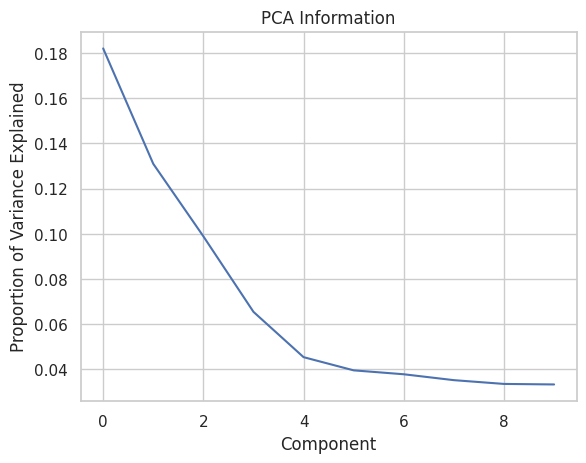

In [ ]:
plt.plot(range(10), pca.explained_variance_ratio_); #Use 1st 4 PCs -- where the elbow is
plt.title("PCA Information")
plt.xlabel("Component")
plt.ylabel("Proportion of Variance Explained");

In [ ]:
class PCAImputer:
    """
    Handle imputation via PCA

    Attributes:
    pca (PCA): The PCA instance that will be used in imputation.
    scaler (StandardScaler): The StandardScaler instance that will prepare data for use in PCA.

    Methods:
    fit_transform: Train the instances above and impute the missing data.
    transform: Use an already-trained instance of PCAImputer to impute missing values in a new dataset.
    """

    def __init__(self):
        self.pca=PCA(n_components=10)
        self.scaler = StandardScaler()

    def fit_transform(self, df):
        """
        Fit an instance of PCA and use it to impute data.

        Precondition:
        Passed DataFrame does not have the ID/Unnamed: 0 column

        Parameters:
        df (DataFrame): DataFrame that needs to be changed.

        Returns:
        DataFrame: The fixed DataFrame.
        """

        imp_x = df.copy()
        changed_entries = [] #To document where imputation needs to happen

        #Impute the mean to start so PCA can actually run
        for i in imp_x.index:
            for col in null_cols:
                if str(imp_x.loc[i, col]) == 'nan':
                    changed_entries.append((i, col))
                    imp_x.loc[i, col] = \
                        training_descriptions.loc[col, 'mean'] #this is a description df initialized below before running

        self.scaler = self.scaler.fit(df)
        standard_vals = self.scaler.transform(imp_x)
        self.pca = self.pca.fit(standard_vals)

        #Math required to go backwards from PCA to original value estimate
        mu = np.mean(standard_vals, axis=0)
        Xhat = np.dot(self.pca.transform(standard_vals)[:,:4], self.pca.components_[:4,:])
        key = pd.DataFrame(self.scaler.inverse_transform(Xhat + mu), columns = x_train.columns[1:])

        #Fill in the entries
        for i in changed_entries:
            imp_x.loc[i[0],i[1]] = key.loc[i[0], i[1]]

        for i in null_cols:
            imp_x[i] = imp_x[i].round(null_cols[i]) #rounding to nice numbers consistent with rest of df
            if null_cols[i] == 0:
                imp_x[i] = imp_x[i].astype(int)

        return imp_x

    def transform(self, df):
        """
        Use an already-trained instance of PCAImputer to impute missing values in a new dataset.

        Precondition:
        Passed DataFrame does not have the ID/Unnamed: 0 column

        Parameters:
        df (DataFrame): DataFrame that needs to be changed.

        Returns:
        DataFrame: The fixed DataFrame.
        """

        #This is largely the same process as above but without the fitting part
        imp_x = df.copy()
        changed_entries = []

        for i in imp_x.index:
            for col in null_cols:
                if str(imp_x.loc[i, col]) == 'nan':
                    changed_entries.append((i, col))
                    imp_x.loc[i, col] = training_descriptions.loc[col, 'mean']
        standard_vals = self.scaler.transform(imp_x)

        mu = np.mean(standard_vals, axis=0)
        Xhat = np.dot(self.pca.transform(standard_vals)[:,:4], self.pca.components_[:4,:])
        key = pd.DataFrame(scaler.inverse_transform(Xhat + mu), columns = x_train.columns[1:])

        for i in changed_entries:
            imp_x.loc[i[0],i[1]] = key.loc[i[0], i[1]]

        for i in null_cols:
            imp_x[i] = imp_x[i].round(null_cols[i])
            if null_cols[i] == 0:
                imp_x[i] = imp_x[i].astype(int)

        return imp_x

In [ ]:
from sklearn.model_selection import train_test_split
#Keeping a testing set completely separate throughout the rest of the process to test

x_train, X_test, y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

x_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace = True)
Y_test.reset_index(drop=True, inplace=True)

training_descriptions = x_train.describe().T #The 'key' matrix as discussed above
pca_imp = PCAImputer()

x_temp = pca_imp.fit_transform(x_train.drop('ID', axis = 1))
x_temp['ID'] = x_train['ID']
cx_train = x_temp #cx_train will be used going forward as the "cleaned"x_train

## EDA
Here, distributions of variables will be investigated, measures will be taken to trend towards normality, handle very extreme values, and get a more in-depth feel for what is going on within the data

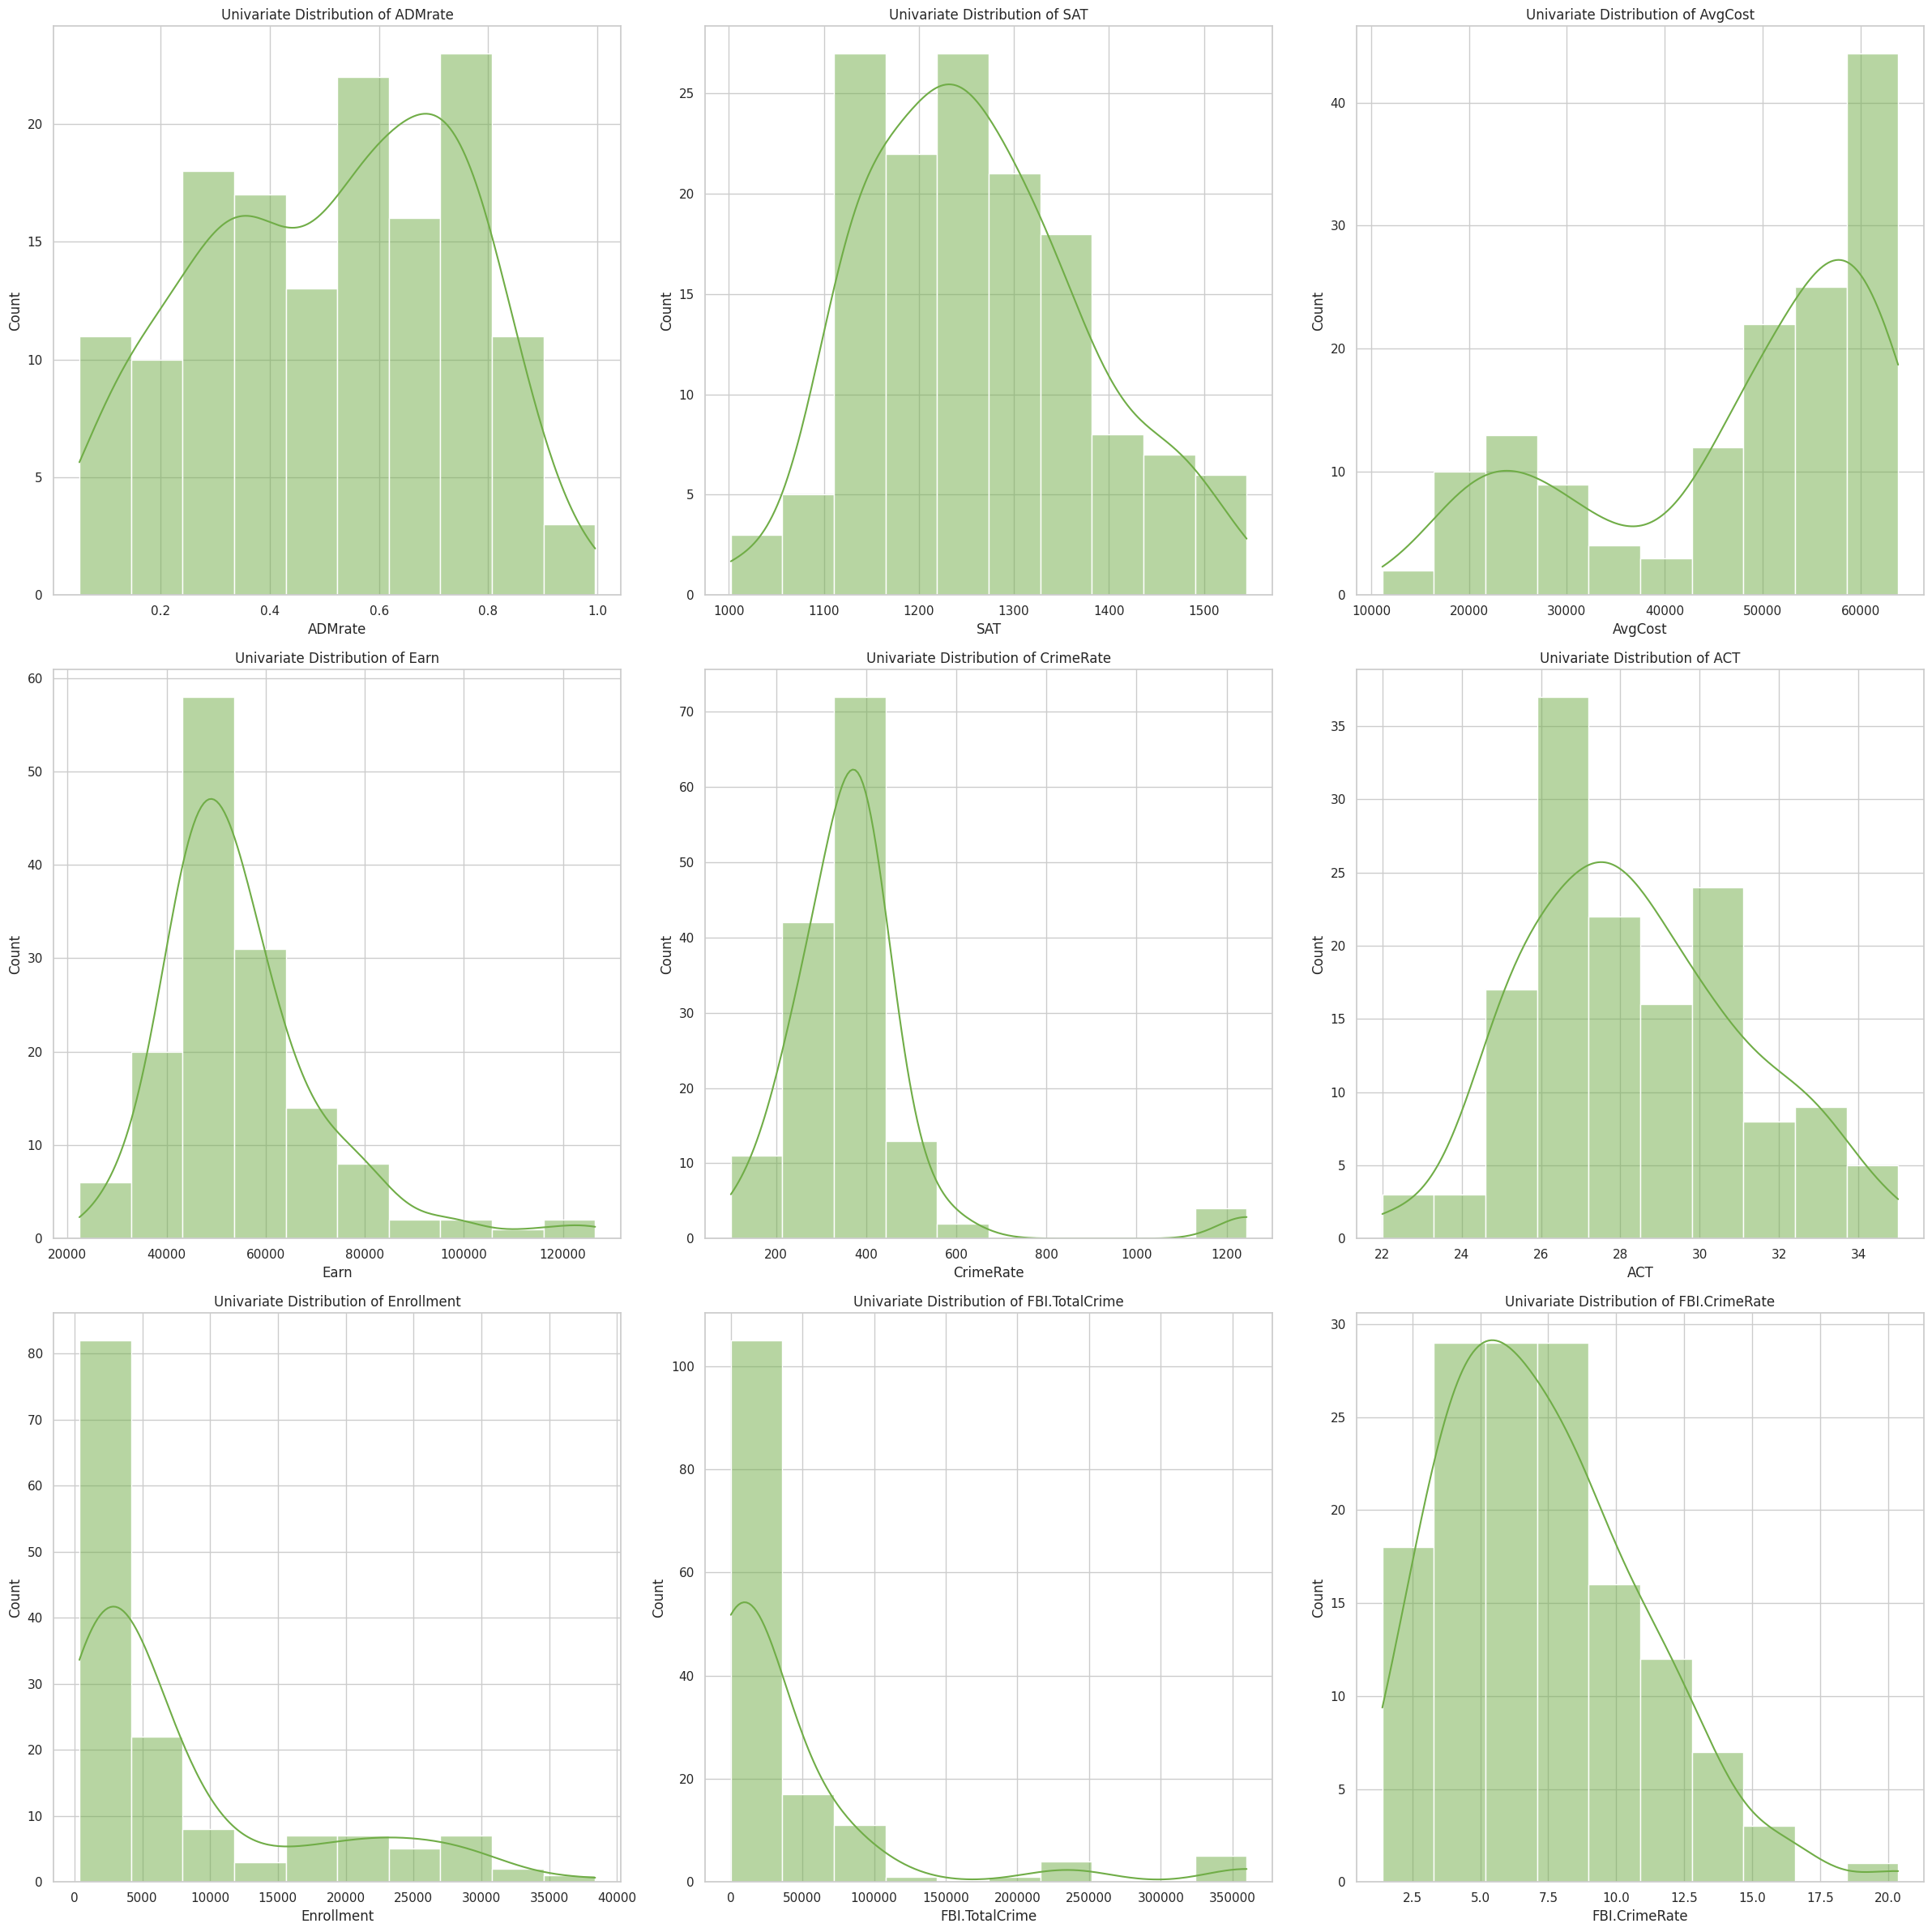

In [ ]:
#Plot univariate distributions of continuous variables, as specified above

sns.set(style="whitegrid")
fig,axs = plt.subplots(3,3, figsize = (24,24))

for i in range(3):
    for j in range(3):
        sns.histplot(data=cx_train, x=continuous[3*i+j], kde=True,
                     color="#70AD47", bins=10,ax=axs[i,j]).set(title=f'Univariate Distribution of {continuous[3*i+j]}')

fig.tight_layout()

In [ ]:
#Keeping track of distributions that look skewed

r_skewed = ['Enrollment', 'Earn','FBI.TotalCrime', 'CrimeRate', 'FBI.CrimeRate']
l_skewed = ['AvgCost']

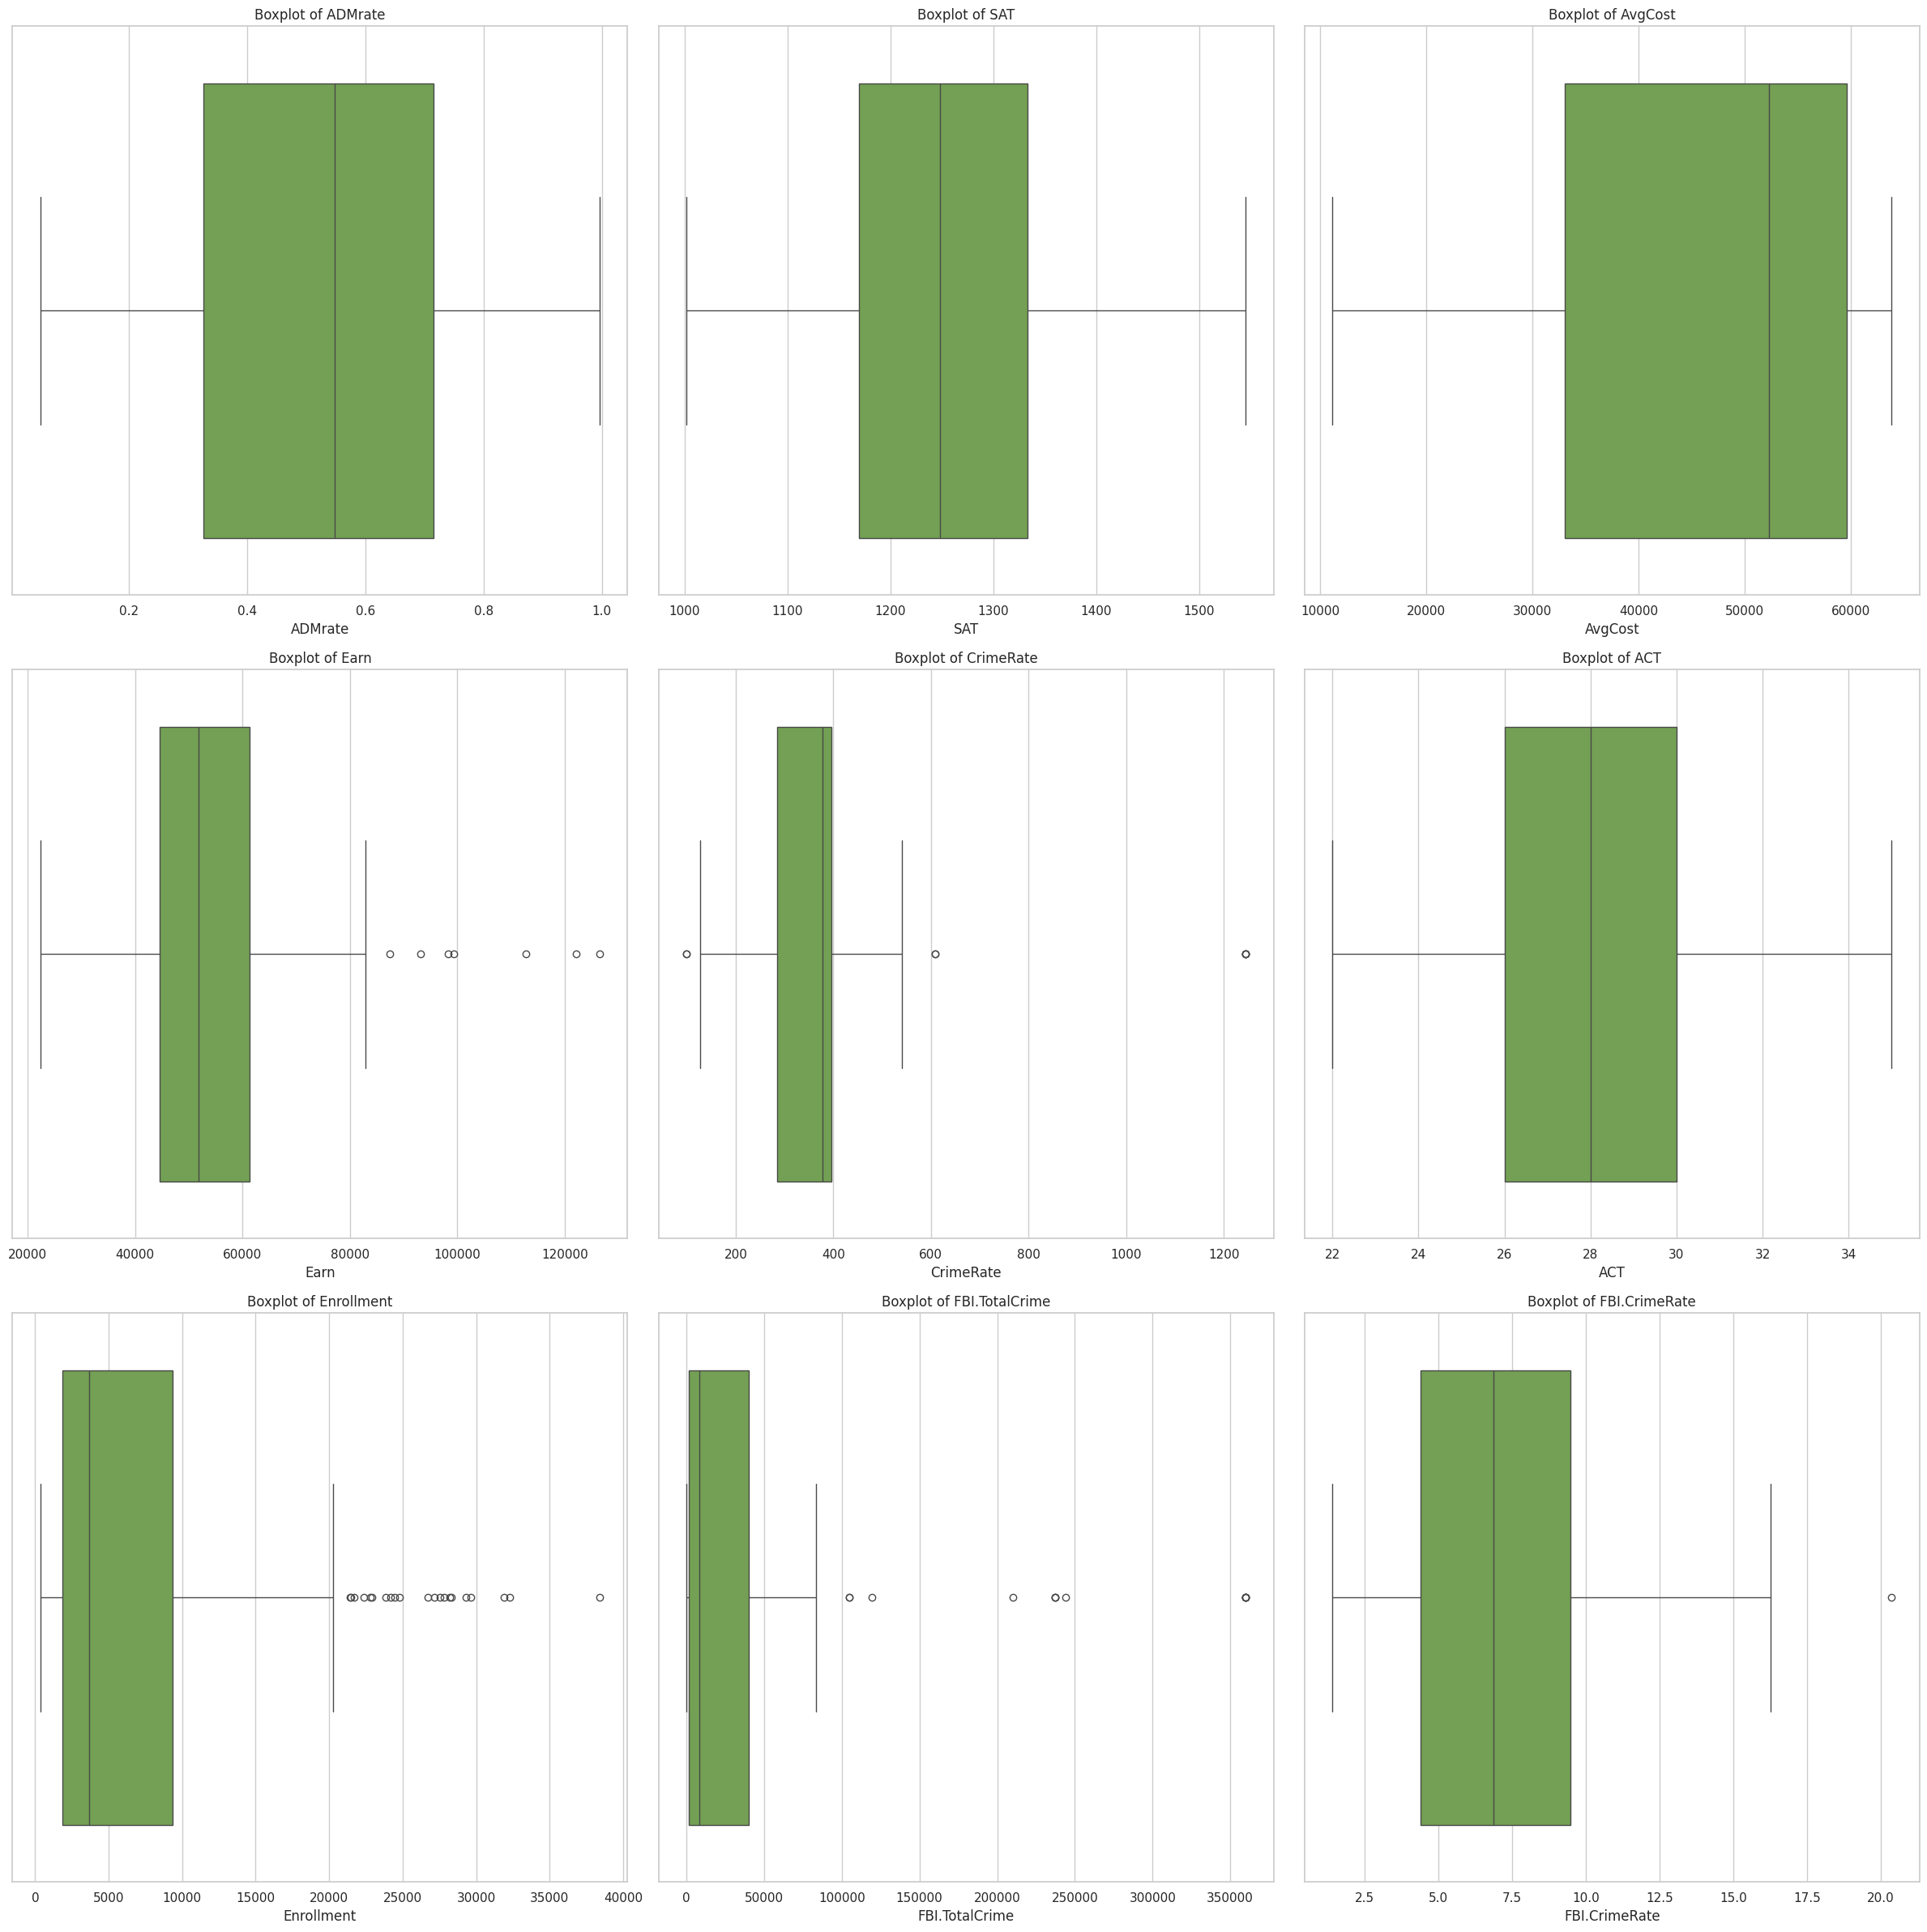

In [ ]:
#Another representation of the distributions

sns.set(style="whitegrid")
fig,axs = plt.subplots(3,3, figsize = (24,24))

for i in range(3):
    for j in range(3):
        sns.boxplot(data=cx_train, x=continuous[3*i+j],
                    color="#70AD47",ax=axs[i,j]).set(title=f"Boxplot of {continuous[3*i+j]}")

fig.tight_layout()

In [ ]:
def trunc_outliers(df):
    """
    Truncate outliers to 3 standard deviations

    Parameters:
    df (DataFrame): DataFrame that needs to be changed.

    Returns:
    DataFrame: The fixed DataFrame.

    Postcondition:
    Prints out the spots in which truncation occurred.
    """

    changes = [] #Keep track of changes
    tbr = df.copy()

    for i in tbr.index:
        for col in continuous:
            val = tbr.loc[i, col]

            #Leveraging the description matrix from above to truncate to 3 st devs
            lo = training_descriptions.loc[col, 'mean'] - 3 * training_descriptions.loc[col, 'std']
            hi = training_descriptions.loc[col, 'mean'] + 3 * training_descriptions.loc[col, 'std']

            if val < lo:
                tbr.loc[i, col] = lo
                changes.append((i, col))
            if val > hi:
                tbr.loc[i, col] = hi
                changes.append((i, col))

    print(changes) #To see a record of how much was truncated

    return tbr

In [ ]:
cx_train = trunc_outliers(cx_train) #truncate outliers in our running df

[(19, 'CrimeRate'), (27, 'CrimeRate'), (30, 'Earn'), (44, 'CrimeRate'), (46, 'Earn'), (78, 'FBI.TotalCrime'), (84, 'CrimeRate'), (85, 'FBI.TotalCrime'), (87, 'Earn'), (99, 'FBI.TotalCrime'), (127, 'FBI.TotalCrime'), (131, 'Enrollment'), (137, 'FBI.TotalCrime'), (138, 'FBI.CrimeRate')]


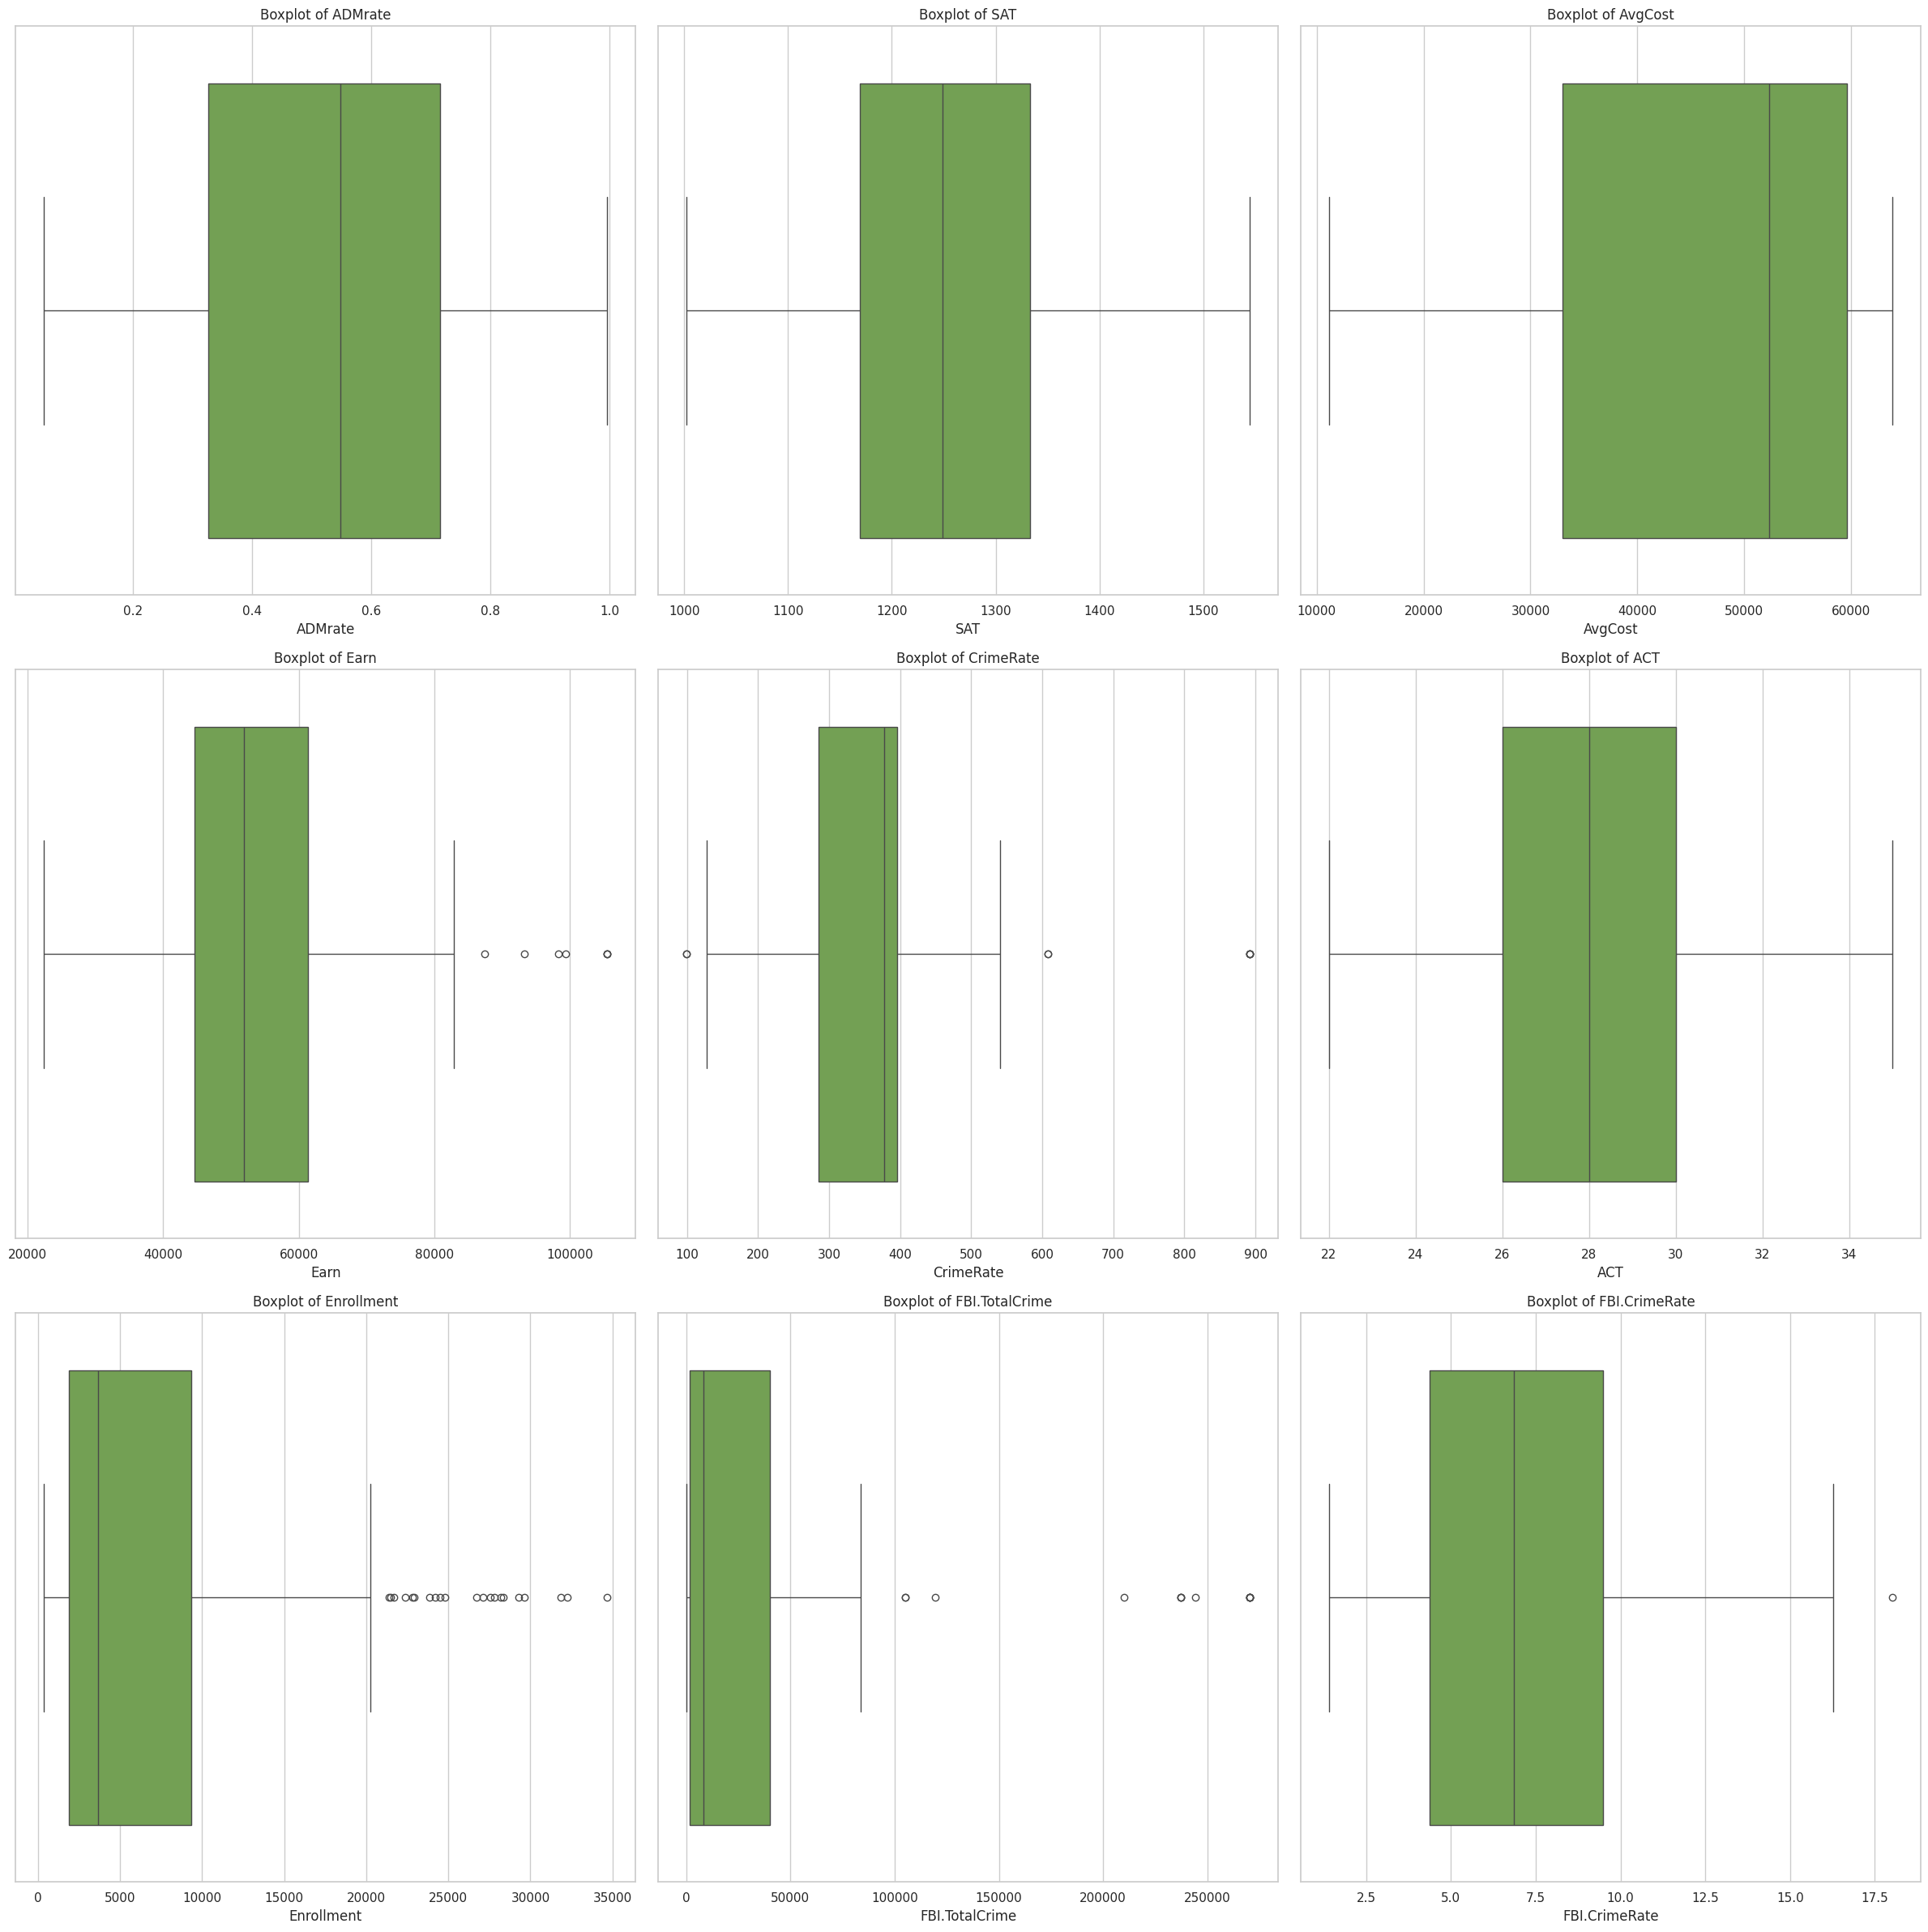

In [ ]:
#Look at boxplots again to see how much it affected the predictors

sns.set(style="whitegrid")
fig,axs = plt.subplots(3,3, figsize = (24,24))

for i in range(3):
    for j in range(3):
        sns.boxplot(data=cx_train, x=continuous[3*i+j],
                    color="#70AD47",ax=axs[i,j]).set(title=f"Boxplot of {continuous[3*i+j]}")

fig.tight_layout()

In [ ]:
cx_train[one_hot].describe().T #Looking at the discrete variables now that we've finished with the continuous

,count,mean,std,min,25%,50%,75%,max
Major_agriculture,144.0,0.118056,0.323800,0.0,0.00,0.0,0.0,1.0
Major_NatureResource,144.0,0.659722,0.475456,0.0,0.00,1.0,1.0,1.0
Major_Architecture,144.0,0.270833,0.445941,0.0,0.00,0.0,1.0,1.0
Major_CS,144.0,0.881944,0.323800,0.0,1.00,1.0,1.0,1.0
Major_Edu,144.0,0.631944,0.483960,0.0,0.00,1.0,1.0,1.0
Major_Engineering,144.0,0.534722,0.500534,0.0,0.00,1.0,1.0,1.0
Major_Bio,144.0,0.930556,0.255096,0.0,1.00,1.0,1.0,1.0
Major_MathStat,144.0,0.937500,0.242906,0.0,1.00,1.0,1.0,1.0
Major_Psychology,144.0,0.895833,0.306543,0.0,1.00,1.0,1.0,1.0
Major_SocialScience,144.0,0.937500,0.242906,0.0,1.00,1.0,1.0,1.0


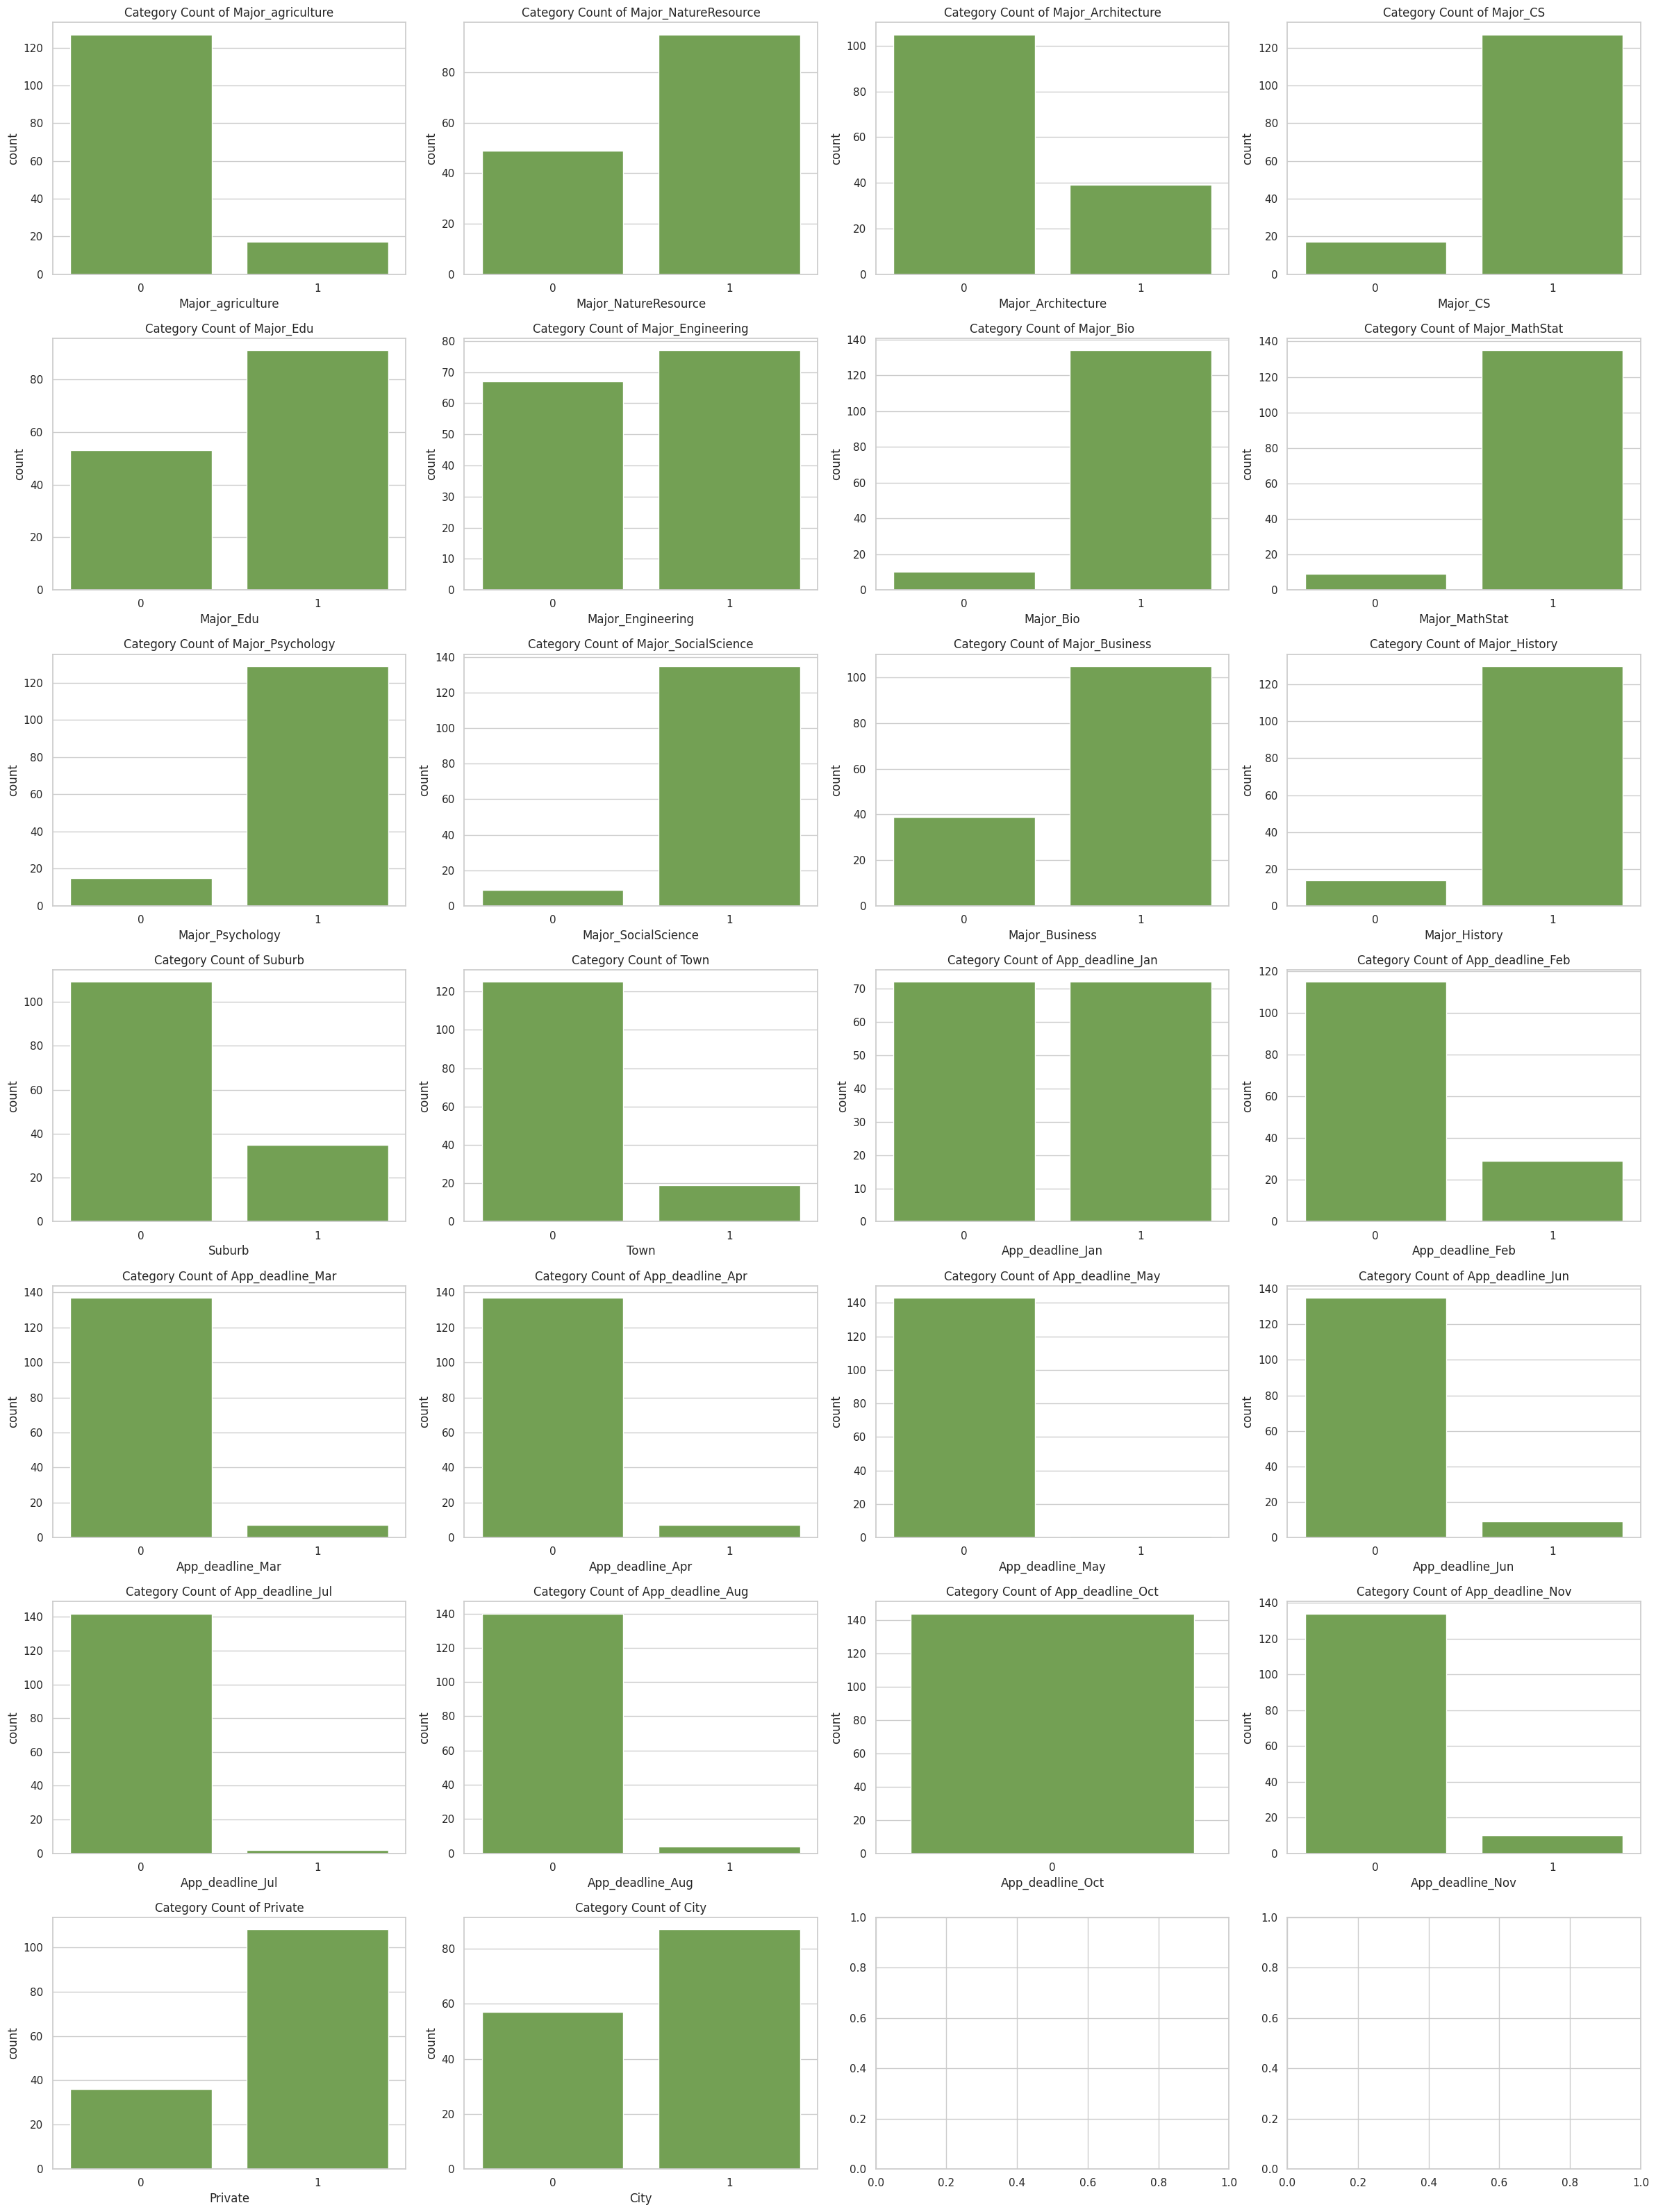

In [ ]:
#Look at frequencies for the discrete variables

sns.set(style="whitegrid")
fig,axs = plt.subplots(7,4, figsize = (24,32))

for i in range(7):
    for j in range(4):
        if i == 6 and j > 1: continue
        sns.countplot(data=cx_train, x=one_hot[4*i+j],
                      color="#70AD47",ax=axs[i,j]).set(title=f'Category Count of {one_hot[4*i+j]}')

fig.tight_layout()

In [ ]:
cx_train.columns #One last look at columns before continuing

Index(['ADMrate', 'SAT', 'AvgCost', 'Major_agriculture',
       'Major_NatureResource', 'Major_Architecture', 'Major_CS', 'Major_Edu',
       'Major_Engineering', 'Major_Bio', 'Major_MathStat', 'Major_Psychology',
       'Major_SocialScience', 'Major_Business', 'Major_History', 'Earn',
       'CrimeRate', 'ACT', 'Enrollment', 'FBI.TotalCrime', 'FBI.CrimeRate',
       'Private', 'City', 'Suburb', 'Town', 'App_deadline_Jan',
       'App_deadline_Feb', 'App_deadline_Mar', 'App_deadline_Apr',
       'App_deadline_May', 'App_deadline_Jun', 'App_deadline_Jul',
       'App_deadline_Aug', 'App_deadline_Oct', 'App_deadline_Nov', 'ID'],
      dtype='object')

In [ ]:
#Dropping unnecessary columns -- X_train will be the working DataFrame going forward

X_train = cx_train.drop('ID', axis = 1).copy()
Y_train = y_train.drop('Unnamed: 0', axis = 1).copy()

## Feature Engineering
Trying here to make new features that could have an effect based on intuition and research into what goes into a happy college experience/good college overall.

In [ ]:
one_hot[:12] #These are all of the 'major' flag variables

['Major_agriculture',
 'Major_NatureResource',
 'Major_Architecture',
 'Major_CS',
 'Major_Edu',
 'Major_Engineering',
 'Major_Bio',
 'Major_MathStat',
 'Major_Psychology',
 'Major_SocialScience',
 'Major_Business',
 'Major_History']

In [ ]:
def engineer_features(df):
    """
    Add Cost:Earn ratio and a metric of the variety of majors offered at a school as well as deal with skew.

    Parameters:
    df (DataFrame): DataFrame that needs to be changed.

    Returns:
    DataFrame: The fixed DataFrame.
    """

    X_train = df.copy()
    X_train['Cost:Earn'] = X_train['AvgCost'] / X_train['Earn']
    X_train['Majors'] = X_train[one_hot[:12]].sum(axis = 1)

    for i in r_skewed:
        X_train["Log_"+i] = X_train[i].apply(np.log)

    for i in l_skewed:
        X_train['2_'+i] = X_train[i].apply(lambda x: x**2)

    return X_train

In [ ]:
X_train = engineer_features(X_train) #Fix up the running DataFrame

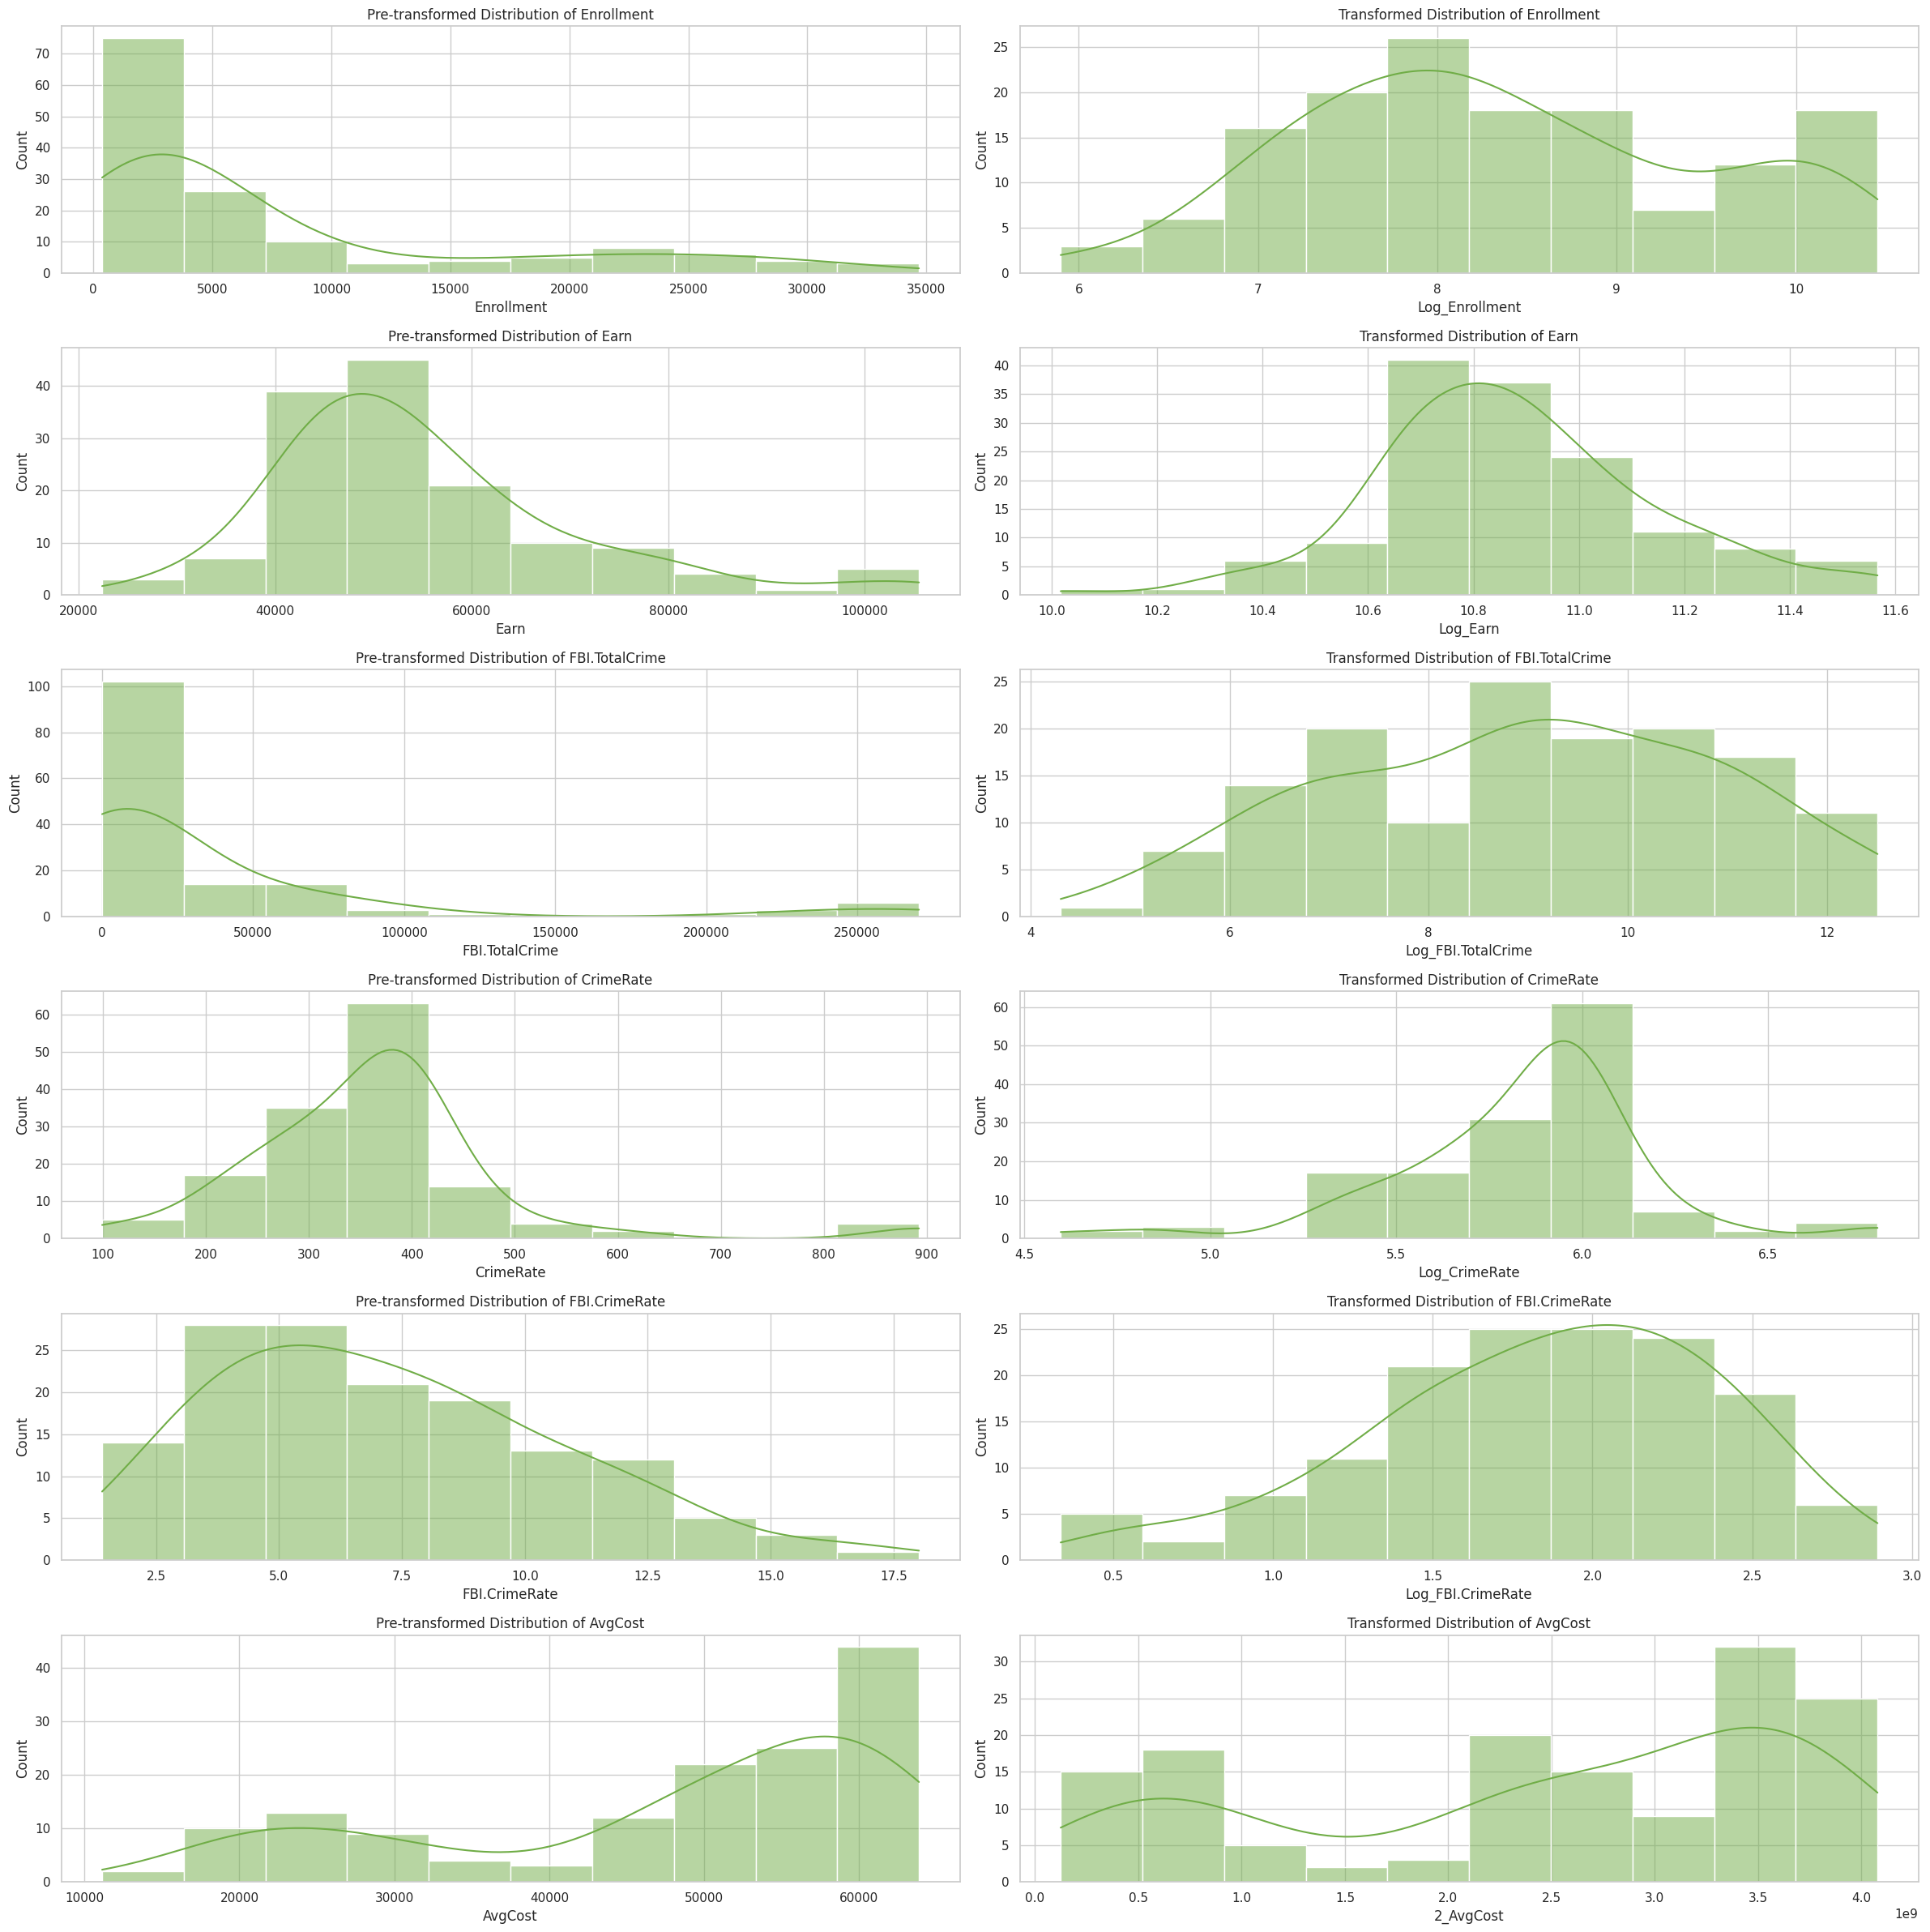

In [ ]:
#Take a look at how the log transformations affected the distributions

sns.set(style="whitegrid")
fig,axs = plt.subplots(len(r_skewed + l_skewed),2, figsize = (24,24))

for i in range(len(r_skewed)):
    sns.histplot(data=X_train, x=r_skewed[i], kde=True, color="#70AD47",
                 bins=10,ax=axs[i,0]).set(title=f"Pre-transformed Distribution of {r_skewed[i]}")
    sns.histplot(data=X_train, x="Log_" + r_skewed[i], kde=True, color="#70AD47",
                 bins=10,ax=axs[i,1]).set(title=f"Transformed Distribution of {r_skewed[i]}")

for i in range(len(l_skewed)):
    sns.histplot(data=X_train, x=l_skewed[i], kde=True, color="#70AD47",
                 bins=10,ax=axs[i+len(r_skewed),0]).set(title=f"Pre-transformed Distribution of {l_skewed[i]}")
    sns.histplot(data=X_train, x="2_" + l_skewed[i], kde=True, color="#70AD47",
                 bins=10,ax=axs[i+len(r_skewed),1]).set(title=f"Transformed Distribution of {l_skewed[i]}")

fig.tight_layout() #Throw out AvgCost transform but the rest look good

In [ ]:
def delete_features(df):
    """
    Counteract undesired effects of engineer_features() as well as clean up redundant information

    Parameters:
    df (DataFrame): DataFrame that needs to be changed.

    Returns:
    DataFrame: The fixed DataFrame.
    """

    X_train = df.copy()

    #Get rid of the variables handled by log transformation
    for i in r_skewed:
        del X_train[i]

    del X_train['2_AvgCost'] #Deemed unnecessary

    return X_train

In [ ]:
X_train = delete_features(X_train) #Apply cleaning up to running df

### Evaluate features against the response variable and each other
Looking here at the effectiveness of the previous engineering and what could be done better.

In [ ]:
X_train.dtypes #All columns are numerical; all the int columns are the discrete features

ADMrate                 float64
SAT                       int64
AvgCost                   int64
Major_agriculture         int64
Major_NatureResource      int64
Major_Architecture        int64
Major_CS                  int64
Major_Edu                 int64
Major_Engineering         int64
Major_Bio                 int64
Major_MathStat            int64
Major_Psychology          int64
Major_SocialScience       int64
Major_Business            int64
Major_History             int64
ACT                       int64
Private                   int64
City                      int64
Suburb                    int64
Town                      int64
App_deadline_Jan          int64
App_deadline_Feb          int64
App_deadline_Mar          int64
App_deadline_Apr          int64
App_deadline_May          int64
App_deadline_Jun          int64
App_deadline_Jul          int64
App_deadline_Aug          int64
App_deadline_Oct          int64
App_deadline_Nov          int64
Cost:Earn               float64
Majors  

In [ ]:
from sklearn.feature_selection import mutual_info_regression

#Here I'll use the mutual information metric to see how useful each predictor is on a surface level

def make_mi_scores(X, y, discrete_features):
    """
    Find the mutual information scores of each predictor in the set relative to the response,

    Parameters:
    X (DataFrame): DataFrame with all of the predictors.
    y (DataFrame): The DataFrame that has the response variable
    discrete_features (array-like): boolean array acts as a mask to specify the discrete features in the dataset

    Returns:
    Series: The mutual information scores of each predictor.
    """

    mi_scores = mutual_info_regression(X, np.ravel(y), discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    """
    Plot mutual information scores of a predictor set

    Parameters:
    scores (Series): The mutual information scores of each predictor.
    """

    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.xlabel("MI Score")
    plt.ylabel("Feature")

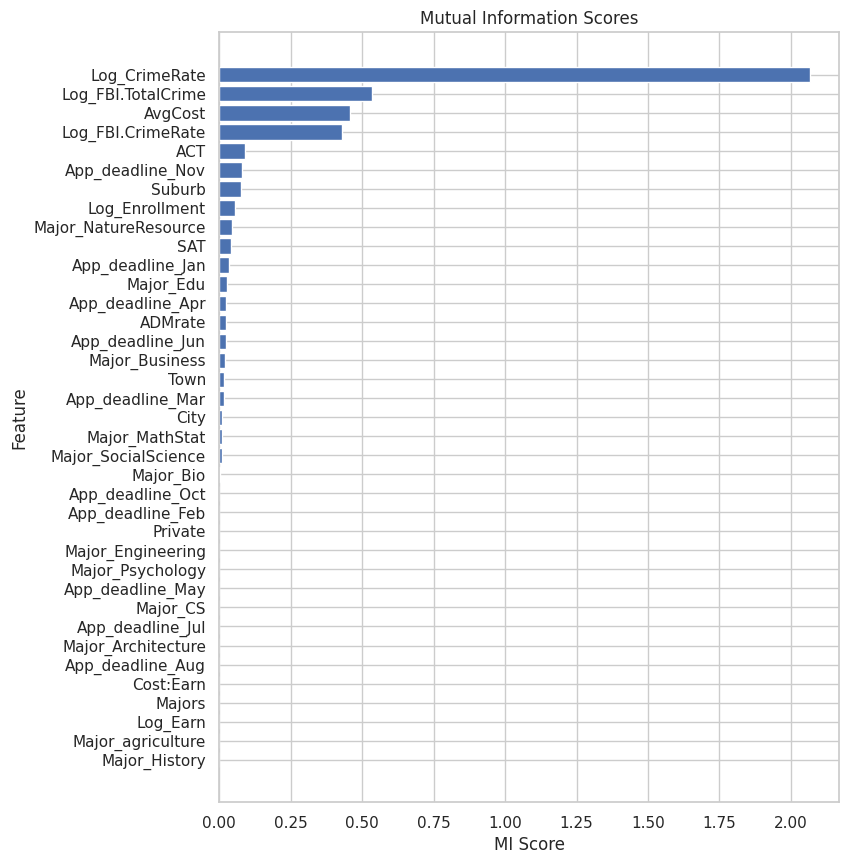

In [ ]:
#Plot the mutual information scores of each predictor

mi_scores = make_mi_scores(X_train, Y_train, X_train.dtypes == int) #Leverages the fact above that all discrete have int type
plt.figure(dpi=100, figsize=(8, 10))
plot_mi_scores(mi_scores)

In [ ]:
X_train.corr() #A huge issue I forsee is multicollinearity -- setting up corr table to investigate

,ADMrate,SAT,AvgCost,Major_agriculture,Major_NatureResource,Major_Architecture,Major_CS,Major_Edu,Major_Engineering,Major_Bio,...,App_deadline_Aug,App_deadline_Oct,App_deadline_Nov,Cost:Earn,Majors,Log_Enrollment,Log_Earn,Log_FBI.TotalCrime,Log_CrimeRate,Log_FBI.CrimeRate
ADMrate,1.000000,-0.829036,-0.498090,0.238328,0.024343,-0.138866,0.049644,0.395106,-0.163717,-0.002526,...,0.201199,NaN,-0.135275,-0.032094,0.121818,0.064345,-0.585869,-0.122901,-0.146530,0.034315
SAT,-0.829036,1.000000,0.527368,-0.198111,-0.093108,0.110410,-0.060217,-0.426879,0.115144,-0.033746,...,-0.184078,NaN,-0.058611,0.047283,-0.186430,-0.141934,0.620859,0.058949,0.068242,-0.075965
AvgCost,-0.498090,0.527368,1.000000,-0.484707,-0.106484,-0.206042,-0.071387,-0.218964,-0.241767,0.088762,...,-0.215543,NaN,-0.242563,0.655850,-0.243437,-0.552927,0.349966,0.019025,0.055858,0.045058
Major_agriculture,0.238328,-0.198111,-0.484707,1.000000,0.217337,0.358176,0.133858,0.234591,0.211841,0.099947,...,0.069118,NaN,0.069375,-0.303888,0.420403,0.417848,-0.162381,-0.131718,-0.056174,-0.158400
Major_NatureResource,0.024343,-0.093108,-0.106484,0.217337,1.000000,0.140860,0.327740,0.302854,0.123456,0.380374,...,-0.146170,NaN,0.196193,-0.049612,0.593721,0.341192,-0.060997,-0.067454,-0.157116,0.002128
Major_Architecture,-0.138866,0.110410,-0.206042,0.358176,0.140860,1.000000,0.077689,0.108683,0.317863,0.043543,...,-0.007924,NaN,0.079402,-0.210041,0.380714,0.433107,0.083583,0.106268,0.012288,-0.057508
Major_CS,0.049644,-0.060217,-0.071387,0.133858,0.327740,0.077689,1.000000,0.345533,0.262779,0.577341,...,-0.069118,NaN,0.099947,-0.265746,0.682853,0.430300,0.226746,0.093962,0.107626,0.073098
Major_Edu,0.395106,-0.426879,-0.218964,0.234591,0.302854,0.108683,0.345533,1.000000,0.125296,0.301313,...,0.041377,NaN,0.038549,-0.116627,0.603947,0.375992,-0.133056,0.110659,-0.012262,0.028922
Major_Engineering,-0.163717,0.115144,-0.241767,0.211841,0.123456,0.317863,0.262779,0.125296,1.000000,0.183321,...,-0.011767,NaN,0.200056,-0.471544,0.460675,0.517042,0.324181,0.194237,0.043405,0.031926
Major_Bio,-0.002526,-0.033746,0.088762,0.099947,0.380374,0.043543,0.577341,0.301313,0.183321,1.000000,...,-0.120057,NaN,0.074627,-0.130165,0.771854,0.330562,0.230289,-0.014905,-0.021291,-0.000363


In [ ]:
from sklearn.cluster import KMeans

#Going to try to cluster data to then feed as a predictor to add any insight
#Also as an effort to consolidate information about highly multicollinear features like ACT, SAT, and ADMrate
#After trying several different ways, this seems like the best, though still not great

class Clusterer:
    """
    Set up a clustering method to add as a feature to be used in regression later

    Attributes:
    kmeans (KMeans): The cluster implement to cluster the data.
    scaler (StandardScaler): The scaler to be used throughout this instance

    Methods:
    fit_predict: Fits a cluster model and appends a column to the DataFrame that has the assigned cluster.
    append_cluster: Adds a cluster column to a given DataFrame based on the already-trained KMeans clusterer.
    """

    def __init__(self):
        self.kmeans = KMeans(n_clusters=2, n_init=10, random_state=0) #An attempt to find 'selective' vs 'not-selective'
        self.scaler = StandardScaler()

    def fit_predict(self, df):
        """
        Fit a KMeans instance and use it to cluster the data

        Parameters:
        df (DataFrame): DataFrame that needs to be changed and the one to train the KMeans instance.

        Returns:
        DataFrame: The edited DataFrame.
        """

        X_train = df.copy()
        self.scaler = self.scaler.fit(X_train[['ACT', 'SAT', 'ADMrate']])

        X_train["Cluster"] = self.kmeans.fit_predict(self.scaler.transform(X_train[['ACT', 'SAT', 'ADMrate']]))
        X_train["Cluster"] = X_train["Cluster"].astype("int") #Make sure this stays numerical
        return X_train

    def append_cluster(self, df):
        """
        Use the instance's KMeans clusterer to append a 'Cluster' feature to the DataFrame

        Parameters:
        df (DataFrame): DataFrame that needs to be changed.

        Returns:
        DataFrame: The edited DataFrame.
        """

        X_train = df.copy()

        X_train["Cluster"] = self.kmeans.predict(self.scaler.transform(X_train[['ACT', 'SAT', 'ADMrate']]))
        X_train["Cluster"] = X_train["Cluster"].astype("int")
        return X_train


In [ ]:
#Use the method outlined above to make a new feature

clust = Clusterer()
X_train = clust.fit_predict(X_train)

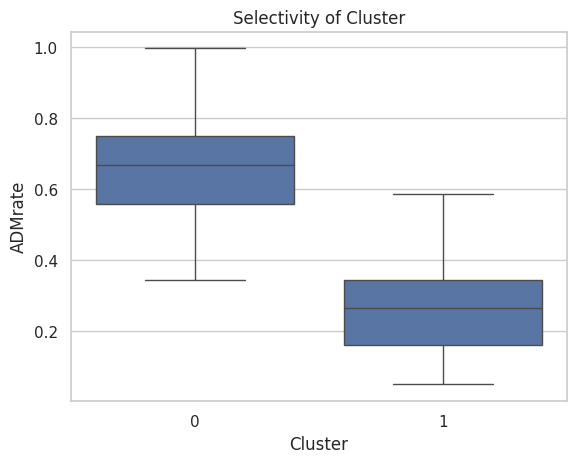

In [ ]:
#Look at ADMrate: high ADMrate = less selective (cluster 0)

sns.boxplot(x=X_train['Cluster'],y=X_train['ADMrate']).set(title='Selectivity of Cluster');

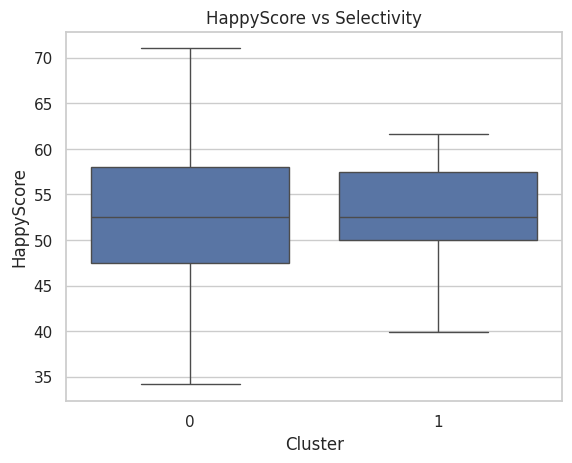

In [ ]:
sns.boxplot(x=X_train['Cluster'], y = np.ravel(Y_train.values)).set(
    title='HappyScore vs Selectivity');
plt.xlabel("Cluster")
plt.ylabel("HappyScore"); #It looks like clustering on selectivity doesn't really matter

### New Encoding of the Application Deadline predictor
Since there are a) a lot of different one-hot encoded vars for App Deadline and b) we have response data to leverage, we can try encoding each month with its associated average HappyScore to try and gain predictive power

In [ ]:
one_hot[-12][-3:] #Sample of how to extract all of the month names

'Jan'

In [ ]:
#First gotta get all of the flag variables back into one variable

def consolidate_months(df):
    """
    Consolidate the flag variables into one predictor.

    Parameters:
    df (DataFrame): DataFrame that needs to be changed.

    Returns:
    DataFrame: The fixed DataFrame.
    """

    X_train1 = df.copy()
    for i in X_train1.index:
        haveImp = False #To track whether or not it has imputed this loop
        for col in one_hot[-12:-2]:
            if X_train1.loc[i, col] == 1:
                X_train1.loc[i, 'Month_App'] = col[-3:]
                haveImp=True
        if(not(haveImp)):
            X_train1.loc[i, 'Month_App'] = 'Dec' #Only month that wouldn't have a variable
    X_train1.drop(one_hot[-12:-2], axis = 1, inplace = True)
    return X_train1

In [ ]:
X_train1 = consolidate_months(X_train) #Apply the above transformation to the running dataset

In [ ]:
#Different encoding of app deadline coming -- first have to split to encode so that the averages obtained from the set...
#...used to train the encoder doesn't inflate model performance later on

X_encode = X_train1.sample(frac=0.25, random_state=42)
y_encode = Y_train.loc[X_encode.index, :]
X_pretrain = X_train1.drop(X_encode.index, axis = 0)
Y_new_train = Y_train.loc[X_pretrain.index, :]

In [ ]:
X_encode #Look at the set that will be used to encode the months to see that everything copied over OK

,ADMrate,SAT,AvgCost,Major_agriculture,Major_NatureResource,Major_Architecture,Major_CS,Major_Edu,Major_Engineering,Major_Bio,...,Town,Cost:Earn,Majors,Log_Enrollment,Log_Earn,Log_FBI.TotalCrime,Log_CrimeRate,Log_FBI.CrimeRate,Cluster,Month_App
117,0.2460,1436,61990,0,1,1,1,1,1,1,...,0,0.709268,11,8.668884,11.378251,10.090962,5.749711,2.061787,1,Jan
19,0.7391,1130,55995,0,0,1,1,1,1,1,...,0,1.095793,10,8.168770,10.841540,11.250079,6.793811,2.437116,0,Feb
82,0.7110,1210,49890,0,0,0,0,0,0,0,...,1,2.227232,0,5.899897,10.016816,5.159055,4.850467,1.184790,0,Feb
97,0.5553,1283,56520,0,1,0,1,1,0,1,...,0,1.200000,8,7.725330,10.760028,11.238067,5.652138,2.192770,0,Jan
56,0.3647,1333,30154,0,0,0,1,0,1,0,...,0,0.372732,4,8.385489,11.300969,6.802395,5.733665,1.481605,1,Apr
12,0.7490,1116,23055,0,1,1,1,1,0,1,...,0,0.545035,10,9.916009,10.652542,9.513699,5.448030,2.125848,0,Jan
132,0.4852,1159,48080,0,1,0,1,1,0,1,...,0,0.965462,9,7.336937,10.815770,7.446585,6.006107,1.011601,0,Feb
65,0.7448,1226,19368,1,0,0,1,0,0,1,...,1,0.473545,8,8.593043,10.618885,6.770789,6.093344,1.597365,0,Mar
66,0.3641,1299,61340,0,1,0,1,1,1,1,...,0,1.002288,10,8.711773,11.021902,9.913933,5.944897,2.264883,1,Jan
18,0.0883,1545,58755,0,0,0,1,0,1,1,...,0,0.729876,7,6.890609,11.296012,12.377156,5.981667,1.790091,1,Jan


In [ ]:
#The class to facilitate the new encoding strategy

class MEstimateEncoder:
    """
    A class to facilitate the supervised encoding of a flag variable set with the associated weighted response average.

    Attributes:
    columns (str): The name of the column to be re-encoded.
    m_val (float): A value to control the weight of a class' average with the overall average
    vals (dict): Stores the values associated with each class to be used for encoding
    overall (float): The overall average of the response when this instance was fit.

    Methods:
    fit: Fit this instance and populate values of vals and overall with encoding information.
    transform: use vals and overall to assign values to each class.
    """

    def __init__(self, col, m):
        self.columns = col
        self.m_val = m
        self.vals = {}
        self.overall = 0

    def fit(self, X, Y):
        """
        Use a training set to assign new values to a categorical variable other than a set of flag variables

        Parameters:
        X (DataFrame): DataFrame that with the column specified in the constructor within it.
        Y (DataFrame): Contains the response variable information

        Postcondition:
        Prints the encoding information for each class.
        """

        #Get a key df for each class' average HappyScore
        total_df = pd.merge(X,Y,right_index=True,left_index=True)
        avg_per_month = total_df.groupby(self.columns)['HappyScore'].agg('mean')
        month_freq = total_df[self.columns].value_counts()
        self.overall = total_df['HappyScore'].mean()

        #Use a weighted combination of overall average with class' average
        for i in avg_per_month.index:
            weight = month_freq[i] / (month_freq[i] + self.m_val)
            self.vals[i] = weight * avg_per_month[i] + (1-weight) * self.overall
        print(self.vals)

    def transform(self, X):
        """
        Fill in the specified categorical variable with its encoding determined from fit().

        Parameters:
        X (DataFrame): DataFrame that needs to be changed.

        Returns:
        DataFrame: The fixed DataFrame.
        """

        df = X.copy()
        for i in df.index:
            val = df.loc[i, self.columns]
            if not(val in self.vals):
                df.loc[i, self.columns] = self.overall #Impute overall average if class not present in encoding scheme
            else:
                df.loc[i, self.columns] = self.vals[val]
        return df

In [ ]:
# Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(col="Month_App", m=4.0)

# Fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

# Encode the Month_App column to create the final training data
X_new_train = encoder.transform(X_pretrain)
X_new_train #The data that will be used going forward

{'Apr': 54.388333333333335, 'Aug': 50.49333333333334, 'Dec': 50.144000000000005, 'Feb': 52.2225, 'Jan': 51.49904761904761, 'Jul': 50.952000000000005, 'Jun': 48.166000000000004, 'Mar': 50.22428571428571, 'May': 50.144000000000005}


,ADMrate,SAT,AvgCost,Major_agriculture,Major_NatureResource,Major_Architecture,Major_CS,Major_Edu,Major_Engineering,Major_Bio,...,Town,Cost:Earn,Majors,Log_Enrollment,Log_Earn,Log_FBI.TotalCrime,Log_CrimeRate,Log_FBI.CrimeRate,Cluster,Month_App
0,0.5400,1005,42739,0,1,0,1,1,1,1,...,0,1.022464,9,7.666222,10.640652,11.024318,5.933041,2.580217,0,52.2225
1,0.6470,1223,47970,0,1,0,1,0,0,1,...,0,1.142143,7,7.387709,10.645425,4.304065,6.410833,1.843719,0,52.2225
2,0.5829,1128,30174,0,1,0,1,0,1,1,...,0,0.693655,9,9.840761,10.680516,10.083473,5.981667,2.002830,0,51.195
3,0.3873,1383,59595,0,1,0,0,0,0,1,...,0,1.655417,6,7.196687,10.491274,9.575539,5.448030,2.177022,1,51.499048
5,0.8131,1209,54536,0,1,0,1,0,0,1,...,0,1.228288,7,7.605392,10.700995,9.575539,5.448030,2.177022,0,51.499048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.6043,1249,50324,0,1,0,1,1,0,1,...,0,0.916648,9,7.540622,10.913269,8.169053,5.913503,1.495149,0,51.195
140,0.5694,1286,23839,1,1,1,1,1,1,1,...,0,0.413872,12,10.285411,10.961278,9.654770,5.670915,1.835776,0,52.2225
141,0.4918,1244,53499,0,0,0,0,1,0,0,...,0,1.279880,2,8.231376,10.640652,10.602120,5.969730,1.800058,0,51.499048
142,0.1856,1330,32074,0,1,1,1,0,1,1,...,0,0.545476,10,10.296441,10.981897,12.377156,5.981667,1.790091,1,51.195


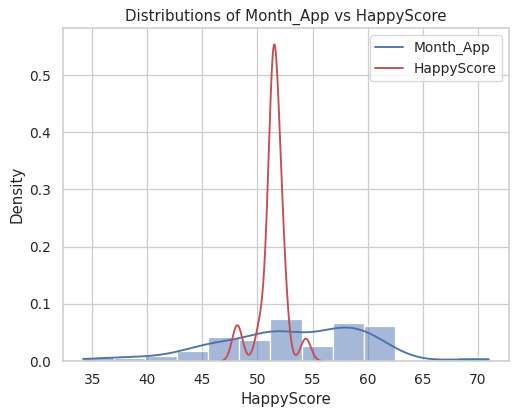

In [ ]:
#Get an idea of how well the distribution of Month_App follows the distribution of HappyScore

plt.figure(dpi=90)
ax = sns.histplot(Y_train, kde=True, stat='density')
ax = sns.kdeplot(X_new_train.Month_App, color='r', ax=ax)
ax.set_xlabel("HappyScore")
ax.legend(labels=['Month_App', 'HappyScore']);
plt.title("Distributions of Month_App vs HappyScore"); #Doesn't look great

In [ ]:
X_new_train.dtypes #Look at the running columns

ADMrate                 float64
SAT                       int64
AvgCost                   int64
Major_agriculture         int64
Major_NatureResource      int64
Major_Architecture        int64
Major_CS                  int64
Major_Edu                 int64
Major_Engineering         int64
Major_Bio                 int64
Major_MathStat            int64
Major_Psychology          int64
Major_SocialScience       int64
Major_Business            int64
Major_History             int64
ACT                       int64
Private                   int64
City                      int64
Suburb                    int64
Town                      int64
Cost:Earn               float64
Majors                    int64
Log_Enrollment          float64
Log_Earn                float64
Log_FBI.TotalCrime      float64
Log_CrimeRate           float64
Log_FBI.CrimeRate       float64
Cluster                   int64
Month_App                object
dtype: object

In [ ]:
X_new_train['Month_App'] = X_new_train['Month_App'].astype(float) #Change Month_App to numerical

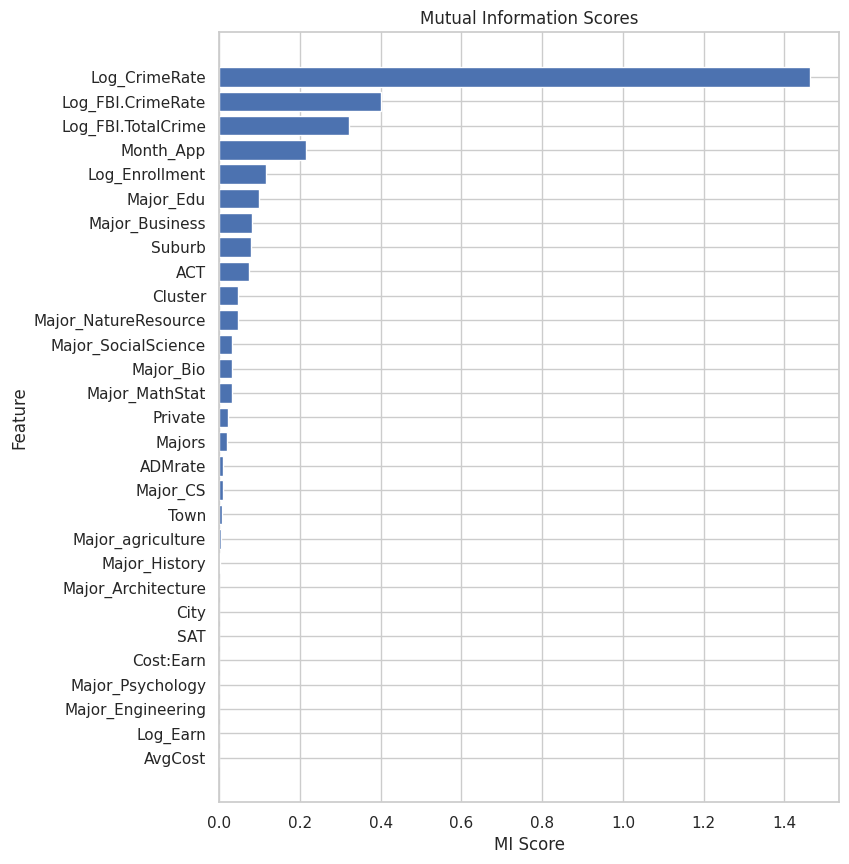

In [ ]:
#Look at mutual information scores again -- Month_App does pretty well

mi_scores = make_mi_scores(X_new_train, Y_new_train, X_new_train.dtypes == int)
plt.figure(dpi=100, figsize=(8, 10))
plot_mi_scores(mi_scores)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Get a more formal look into multicollinearity between features

vif_data = pd.DataFrame()
vif_data["feature"] = X_new_train.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_new_train.values, i)
                          for i in range(len(X_new_train.columns))]

print(vif_data) #It makes sense all of the majors have infinite because they all add up to each other

                 feature          VIF
0                ADMrate    30.491127
1                    SAT  5367.184624
2                AvgCost   152.159755
3      Major_agriculture          inf
4   Major_NatureResource          inf
5     Major_Architecture          inf
6               Major_CS          inf
7              Major_Edu          inf
8      Major_Engineering          inf
9              Major_Bio          inf
10        Major_MathStat          inf
11      Major_Psychology          inf
12   Major_SocialScience          inf
13        Major_Business          inf
14         Major_History          inf
15                   ACT  5052.239160
16               Private    27.206807
17                  City    46.400253
18                Suburb    20.810467
19                  Town     9.355715
20             Cost:Earn    44.541616
21                Majors          inf
22        Log_Enrollment   294.961218
23              Log_Earn  4572.893212
24    Log_FBI.TotalCrime    63.580397
25         L

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


There are no features above that have an acceptable VIF (<5). The Month_App is one of the most highly multicollinear variables in the set; it's too redundant to be worth losing the data used to encode it. The rest of the variables will be dealt with as models are trained.

In [ ]:
X_train.columns #look once again at the training data before the attempt to re-encode Month_App...

Index(['ADMrate', 'SAT', 'AvgCost', 'Major_agriculture',
       'Major_NatureResource', 'Major_Architecture', 'Major_CS', 'Major_Edu',
       'Major_Engineering', 'Major_Bio', 'Major_MathStat', 'Major_Psychology',
       'Major_SocialScience', 'Major_Business', 'Major_History', 'ACT',
       'Private', 'City', 'Suburb', 'Town', 'App_deadline_Jan',
       'App_deadline_Feb', 'App_deadline_Mar', 'App_deadline_Apr',
       'App_deadline_May', 'App_deadline_Jun', 'App_deadline_Jul',
       'App_deadline_Aug', 'App_deadline_Oct', 'App_deadline_Nov', 'Cost:Earn',
       'Majors', 'Log_Enrollment', 'Log_Earn', 'Log_FBI.TotalCrime',
       'Log_CrimeRate', 'Log_FBI.CrimeRate', 'Cluster'],
      dtype='object')

In [ ]:
X_new_train.columns #...vs the training set with the encoding. The rest of the columns are the same.

Index(['ADMrate', 'SAT', 'AvgCost', 'Major_agriculture',
       'Major_NatureResource', 'Major_Architecture', 'Major_CS', 'Major_Edu',
       'Major_Engineering', 'Major_Bio', 'Major_MathStat', 'Major_Psychology',
       'Major_SocialScience', 'Major_Business', 'Major_History', 'ACT',
       'Private', 'City', 'Suburb', 'Town', 'Cost:Earn', 'Majors',
       'Log_Enrollment', 'Log_Earn', 'Log_FBI.TotalCrime', 'Log_CrimeRate',
       'Log_FBI.CrimeRate', 'Cluster', 'Month_App'],
      dtype='object')

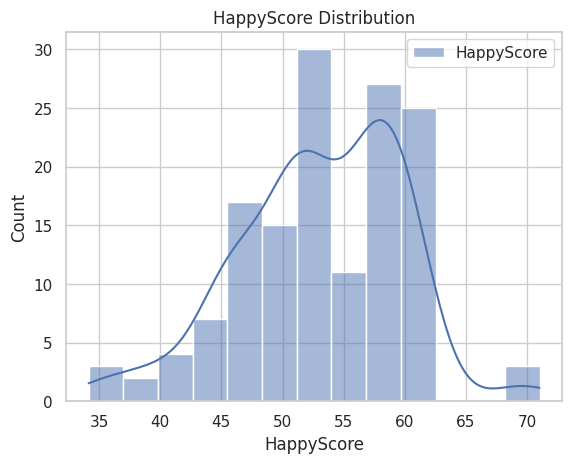

In [ ]:
#Look at the distribution of the response to see if it needs any transformation

sns.histplot(Y_train, kde=True).set(title='HappyScore Distribution');
plt.xlabel("HappyScore");

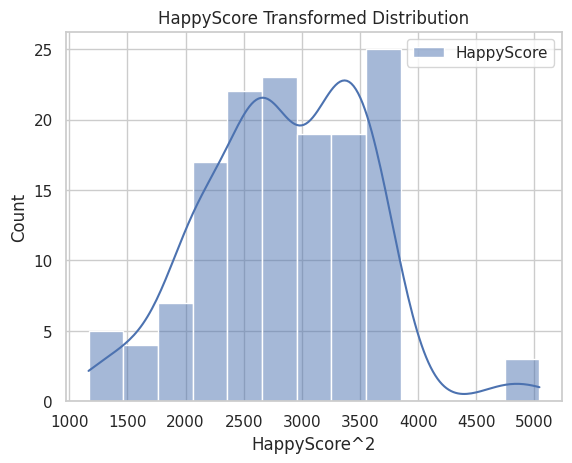

In [ ]:
#Looked a little left-skewed but the transform didn't help much so leave it

sns.histplot(Y_train ** 2, kde=True).set(title='HappyScore Transformed Distribution');
plt.xlabel("HappyScore^2");

In [ ]:
x_final = X_train.copy() #Getting prepared to head into the final stages of data manipulation

In [ ]:
x_final.columns #One last look at the predictor set

Index(['ADMrate', 'SAT', 'AvgCost', 'Major_agriculture',
       'Major_NatureResource', 'Major_Architecture', 'Major_CS', 'Major_Edu',
       'Major_Engineering', 'Major_Bio', 'Major_MathStat', 'Major_Psychology',
       'Major_SocialScience', 'Major_Business', 'Major_History', 'ACT',
       'Private', 'City', 'Suburb', 'Town', 'App_deadline_Jan',
       'App_deadline_Feb', 'App_deadline_Mar', 'App_deadline_Apr',
       'App_deadline_May', 'App_deadline_Jun', 'App_deadline_Jul',
       'App_deadline_Aug', 'App_deadline_Oct', 'App_deadline_Nov', 'Cost:Earn',
       'Majors', 'Log_Enrollment', 'Log_Earn', 'Log_FBI.TotalCrime',
       'Log_CrimeRate', 'Log_FBI.CrimeRate', 'Cluster'],
      dtype='object')

### Final preparations before model training
Fix the training data to be scaled so that it doesn't have to get done later. Also bring the validation testing set up to speed in cleaning and the the real testing set as well

In [ ]:
scaler_final = StandardScaler() #This will be the scaler that will be used for all data going into models
X_final = scaler_final.fit_transform(x_final)
X_final = pd.DataFrame(X_final, columns = x_final.columns)

In [ ]:
def clean_up_fully(x, from_beg=True):
    """
    Go through all of the steps that were done to the training set up until this point for any other DataFrame
    following the same format as the training set originally did.

    Parameters:
    x (DataFrame): Feature DataFrame that needs to be changed.
    from_beg (bool): Whether or not the process should start from the step right after the dataset was read in (default=True).

    Returns:
    DataFrame: The fixed feature DataFrame.
    """

    X_test = x.copy()

    if(from_beg): #These are the steps before the validation testing set got split off from the training set
        X_test = fill_earn(X_test)
        X_test = clean_data(X_test)

    #All of the methods and classes defined above
    X_test_prep = pca_imp.transform(X_test.drop('ID', axis = 1))
    X_test_prep = trunc_outliers(X_test_prep)
    X_test_prep = engineer_features(X_test_prep)
    X_test_prep = delete_features(X_test_prep)
    X_test_prep = clust.append_cluster(X_test_prep)
    X_test_final = pd.DataFrame(scaler_final.transform(X_test_prep), columns = X_test_prep.columns)

    return X_test_final

In [ ]:
X_test_final = clean_up_fully(X_test,from_beg=False) #Get testing sets ready for model-feeding
del Y_test['Unnamed: 0']

[(4, 'FBI.TotalCrime')]


## Model training
Going to go forward with a variety of models to try and get best predicting power. General format will be determining best hyper-parameters using cross-validation, then using those parameters to recursively determine the optimal features for the given model, and finally getting a variety of error metrics to see the model's performance.

### Preliminary steps
The formalities that need to get out of the way -- methods to get a variety of error metrics through a cross-validation approach, get error metrics from the separate testing set approach, make residual plots of predicted y vs. residual, and a residual plot of the Crime Rate predictor variable against residuals (you'll see why once the training starts)

In [ ]:
from sklearn.model_selection import cross_val_score

def print_metrics(model, name, X_train=X_train, Y_train=Y_train):
    """
    Prints out scores determined by cross-validation for a model: r2, RMSE, MAPE

    Parameters:
    model (BaseEstimator): The model that will be used to get error metrics from.
    name (str): Name of the ML technique.
    X_train (DataFrame): The set that will be used as predictors (default is all of the predictors).
    Y_train (DataFrame): The response variable that will be used (default is un-altered response).
    """

    r2 = cross_val_score(model, X_train, np.ravel(Y_train), scoring='r2')
    print(f"{name} R-squared:", r2.mean())

    rmse = cross_val_score(model, X_train, np.ravel(Y_train), scoring='neg_root_mean_squared_error')
    print(f"{name} RMSE:", -1 * rmse.mean())

    mape = cross_val_score(model, X_train, np.ravel(Y_train), scoring='neg_mean_absolute_percentage_error')
    print(f"{name} MAPE:", -1 * mape.mean() * 100)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def print_test_metrics(name, test, predicted_y):
    """
    Print out r2, RMSE, and MAPE for given predictions against ground truth

    Parameters:
    name (str): Name of technique used to get results.
    test (array-like): Ground Truth of the testing set.
    predicted_y (array-like): Predictions from the model
    """

    test_y = np.ravel(test.copy())
    r2 = r2_score(test_y, predicted_y)
    print(f"{name} R-squared:", r2)

    rmse = np.sqrt(mean_squared_error(test_y, predicted_y))
    print(f"{name} RMSE:", rmse)

    mape = np.mean(np.abs((test_y - predicted_y) / test_y)) * 100
    print(f"{name} MAPE:", mape)

In [ ]:
def res_plot(y_hat, Y_test=Y_test):
    """
    Plot a residual plot of predicted y against its associated residual

    Parameters:
    y_hat (array-like): The predicted y from a model.
    Y_test (array-like): What to compare predictions against (Ground Truth; default is un-altered response).
    """

    residuals = y_hat - np.ravel(Y_test)
    plt.scatter(y_hat, residuals)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title('Residual Plot')
    plt.xlabel('y_hat')
    plt.ylabel('Residual')
    plt.show()

def plot_vs_CR(resid,power=1):
    """
    Plot a residual plot of Log_CrimeRate against residual

    Parameters:
    resid (array-like): The residuals.
    power (float): What to raise Log_CrimeRate to (default is 1).
    """

    plt.scatter(X_test_final['Log_CrimeRate'] ** power, resid)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title('Residual Plot')
    plt.xlabel('Log_CrimeRate (Standardized)')
    plt.ylabel('Residual')
    plt.show()

In [ ]:
from sklearn.dummy import DummyRegressor

#Get baseline error metrics when no models are used

dummy = DummyRegressor()
print_metrics(dummy, "Baseline")

Baseline R-squared: -0.025621903729773486
Baseline RMSE: 6.619221930002394
Baseline MAPE: 10.620389516736928


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

#Find optimal hyper-parameters

rf = RandomForestRegressor()

param_dist = {"max_depth": [3, None],
              "max_features": ["sqrt", "log2",None],
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "n_estimators": sp_randint(50,200),
              "bootstrap": [True, False],
              "criterion": ["squared_error", "absolute_error"]}

samples = 10  # number of random samples
randomCV_rf = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=samples,cv=5, random_state = 0)

randomCV_rf.fit(X_final.loc[:, ['Log_CrimeRate']], np.ravel(Y_train))
print(randomCV_rf.best_params_)

{'bootstrap': True, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 78}


In [ ]:
#Choose optimal predictor set

rf4 = RandomForestRegressor(**randomCV_rf.best_params_)

from sklearn.feature_selection import RFECV

selector = RFECV(rf4, step=1, cv=5)
selector = selector.fit(X_final, np.ravel(Y_train))
print(selector.support_)
print(selector.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False]
[ 9  8  5 25 20 24 26 18 21 38 30 32 35 14 34 15 27 22 16 11 19 17 28  7
 29 12 37 33 31 23  3 13  6 10  2  1  4 36]


In [ ]:
X_final.columns[selector.support_] #The chosen columns

Index(['Log_CrimeRate'], dtype='object')

In [ ]:
print_metrics(rf4, "Random Forest*", X_train=X_final.loc[:,selector.support_])

Random Forest* R-squared: 0.3913527621179342
Random Forest* RMSE: 5.048434254538294
Random Forest* MAPE: 6.301671606430524


In [ ]:
rf4.fit(X_final.loc[:, selector.support_], np.ravel(Y_train))
pred = rf4.predict(X_test_final.loc[:, selector.support_])
print_test_metrics('Random Forest', Y_test, pred)

Random Forest R-squared: 0.6154855261090212
Random Forest RMSE: 3.584347307594665
Random Forest MAPE: 4.9343387892114015


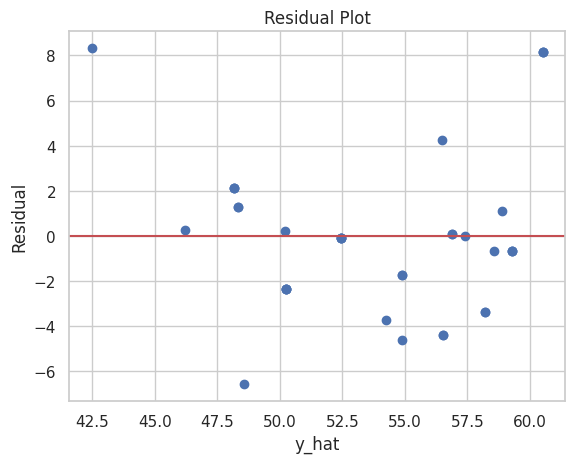

In [ ]:
res_plot(pred, Y_test=Y_test) #Kinda faint downward correlation -- suggests the model is missing some sort of relationship

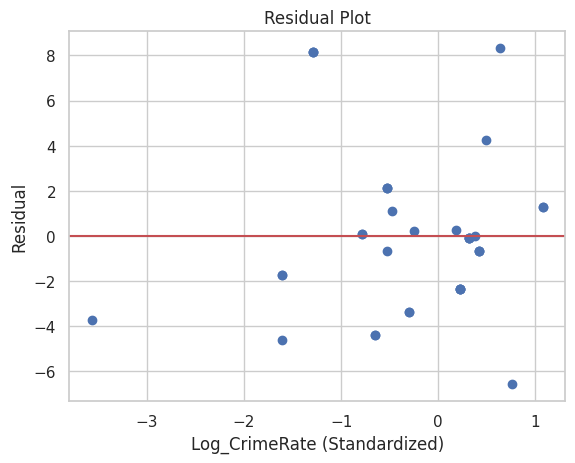

In [ ]:
plot_vs_CR((pred - np.ravel(Y_test))) #Funneling as Crime Rate increases

### Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

param_dist = {"max_depth": [4, None],
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "n_estimators": sp_randint(30,150),
              "loss": ['squared_error', 'absolute_error', 'huber', 'quantile'],
              "learning_rate": sp.stats.uniform(0, 1)
              }

samples = 10
randomCV_gbr = RandomizedSearchCV(gbr, param_distributions=param_dist, n_iter=samples,cv=5, random_state=0)

randomCV_gbr.fit(X_final, np.ravel(Y_train))
print(randomCV_gbr.best_params_)

{'learning_rate': 0.4236547993389047, 'loss': 'absolute_error', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 9, 'n_estimators': 100}


In [ ]:
gbr = GradientBoostingRegressor(**randomCV_gbr.best_params_)

selector1 = RFECV(gbr, step=1, cv=5)
selector1 = selector1.fit(X_final, np.ravel(Y_train))
print(selector1.support_)
print(selector1.ranking_)

[ True  True  True False  True  True  True  True  True False False  True
 False  True False  True  True  True False  True  True  True  True  True
 False  True False False False False  True  True  True  True  True  True
  True False]
[ 1  1  1  2  1  1  1  1  1  5 12  1  8  1  7  1  1  1 10  1  1  1  1  1
  6  1  4  3 11 13  1  1  1  1  1  1  1  9]


In [ ]:
X_final.columns[selector1.support_]

Index(['ADMrate', 'SAT', 'AvgCost', 'Major_NatureResource',
       'Major_Architecture', 'Major_CS', 'Major_Edu', 'Major_Engineering',
       'Major_Psychology', 'Major_Business', 'ACT', 'Private', 'City', 'Town',
       'App_deadline_Jan', 'App_deadline_Feb', 'App_deadline_Mar',
       'App_deadline_Apr', 'App_deadline_Jun', 'Cost:Earn', 'Majors',
       'Log_Enrollment', 'Log_Earn', 'Log_FBI.TotalCrime', 'Log_CrimeRate',
       'Log_FBI.CrimeRate'],
      dtype='object')

In [ ]:
print_metrics(gbr, "GBR*", X_train=X_final.loc[:, selector1.support_], Y_train=Y_train)

GBR* R-squared: 0.20812332537246575
GBR* RMSE: 5.7396384129532425
GBR* MAPE: 8.173427596956959


In [ ]:
gbr.fit(X_final.loc[:, selector1.support_], np.ravel(Y_train))
pred = gbr.predict(X_test_final.loc[:, selector1.support_])
print_test_metrics('GBR', Y_test, pred)

GBR R-squared: 0.4559110330007007
GBR RMSE: 4.263720208198422
GBR MAPE: 5.867133454033626


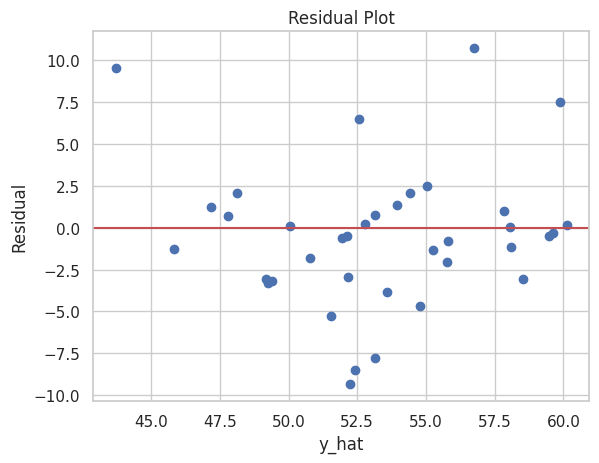

In [ ]:
res_plot(pred, Y_test=Y_test) #This doesn't look great -- downward sloping again but worse

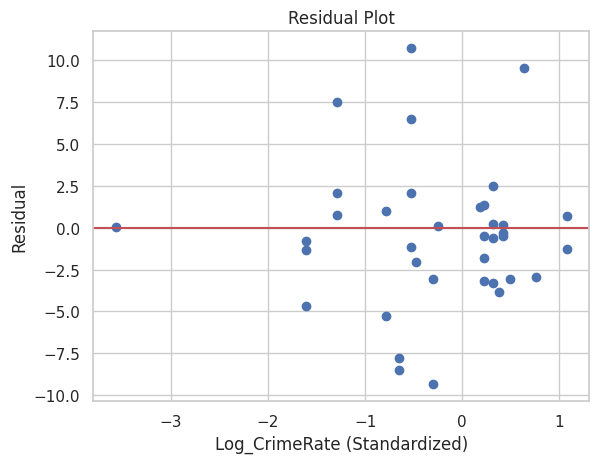

In [ ]:
plot_vs_CR((pred - np.ravel(Y_test)))

### K-Nearest Neighbors

In [ ]:
knn_cols = ['Log_CrimeRate'] #Can't do RFE with this method, so just CrimeRate seems to be working well

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor()

param_dist = {
    'n_neighbors': sp_randint(1, 25),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

samples = 10
randomCV_knn = RandomizedSearchCV(neigh, param_distributions=param_dist, n_iter=samples,cv=5, random_state=0)

randomCV_knn.fit(X_final.loc[:, knn_cols], np.ravel(Y_train))
print(randomCV_knn.best_params_)

{'algorithm': 'auto', 'n_neighbors': 20, 'p': 1, 'weights': 'distance'}


In [ ]:
neigh = KNeighborsRegressor(**randomCV_knn.best_params_)

In [ ]:
print_metrics(neigh, "KNN*", X_train=X_final.loc[:, knn_cols])

KNN* R-squared: 0.66185406223255
KNN* RMSE: 3.5384173283363025
KNN* MAPE: 2.0911289979986347


In [ ]:
neigh.fit(X_final.loc[:, knn_cols], np.ravel(Y_train))
pred = neigh.predict(X_test_final.loc[:, knn_cols])
print_test_metrics('KNN', Y_test, pred)

KNN R-squared: 0.9932041052493888
KNN RMSE: 0.4765155312308621
KNN MAPE: 0.13166163154559551


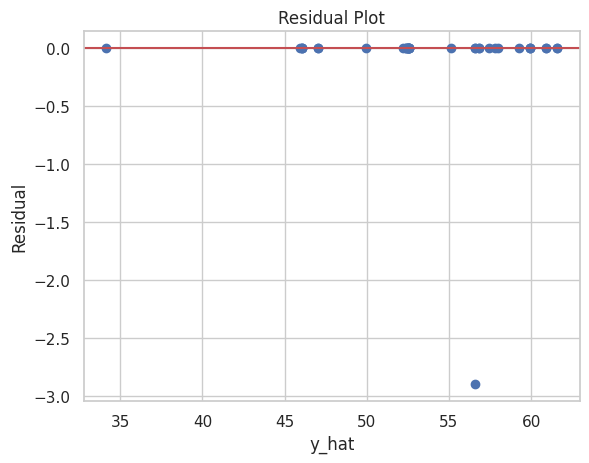

In [ ]:
res_plot(pred) #This is really accurate

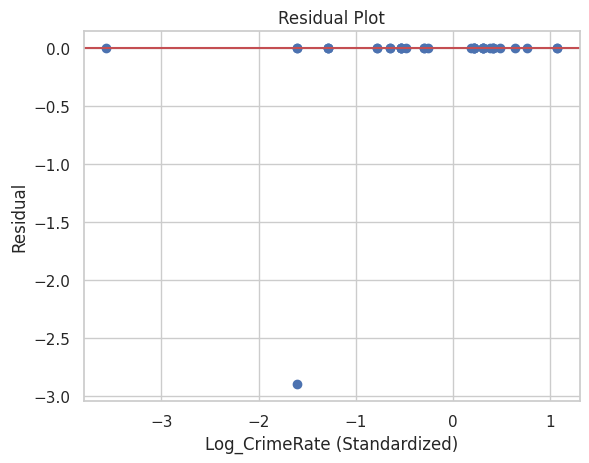

In [ ]:
plot_vs_CR((pred - np.ravel(Y_test)))

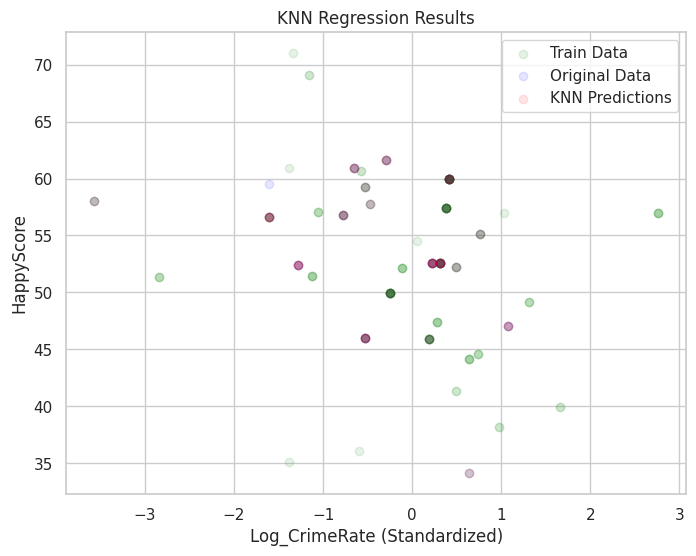

In [ ]:
#Going to investigate why kNN is so accurate; plotting original, predictions, and training set together

plt.figure(figsize=(8, 6))


# Plot training data
plt.scatter(X_final['Log_CrimeRate'], Y_train, color='green', label='Train Data', alpha =0.1)
# Plot the original data points
plt.scatter(X_test_final['Log_CrimeRate'], Y_test, color='blue', label='Original Data', alpha=.1)
# Plot the KNN predictions
plt.scatter(X_test_final['Log_CrimeRate'], pred, color='red', label='KNN Predictions',alpha=.1)



plt.xlabel('Log_CrimeRate (Standardized)')
plt.ylabel('HappyScore')
plt.title('KNN Regression Results')
plt.legend()
plt.show()

There is a lot of overlap within even the training data itself -- same crime rates tend to have the same HappyScores. Already checked for duplicate records in the data at the very beginning so that's not the issue/pattern here.

### Ordinary Least Squares
Less is more?

In [ ]:
#Skip the hyper-parameter tuning since OLS doesn't have really any to tune

from sklearn.linear_model import LinearRegression
ols = LinearRegression()

selector3 = RFECV(ols, step=1, cv=5)
selector3 = selector3.fit(X_final, np.ravel(Y_train))
print(selector3.support_)
print(selector3.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
  True False]
[23 19 21 29 31 33 34 11 16 35 30 20 32  4 13 24 22  6  7  5 15 17 26  2
 36 27 25 18 37 10  9 12 28  8  1  3  1 14]


In [ ]:
X_final.columns[selector3.support_]

Index(['Log_FBI.TotalCrime', 'Log_FBI.CrimeRate'], dtype='object')

In [ ]:
print_metrics(ols, "OLS*", X_train=X_final.loc[:, selector3.support_])

OLS* R-squared: -0.015552258470771286
OLS* RMSE: 6.566327428592322
OLS* MAPE: 10.365509086781197


In [ ]:
# Look at the coefficients to see how each of them contribute

ols.fit(X_final.loc[:,selector3.support_], Y_train)
for i in range(len(ols.coef_[0])):
    print(ols.coef_[0][i], X_final.loc[:,selector3.support_].columns[i])
print(ols.intercept_[0], "Intercept")

1.7668398380740746 Log_FBI.TotalCrime
-2.47642841690237 Log_FBI.CrimeRate
53.07798611111111 Intercept


In [ ]:
ols.fit(X_final.loc[:, selector3.support_], np.ravel(Y_train))
pred = ols.predict(X_test_final.loc[:, selector3.support_])
print_test_metrics('OLS', Y_test, pred)

OLS R-squared: 0.0669366327473363
OLS RMSE: 5.583535834195088
OLS MAPE: 8.870366622889126


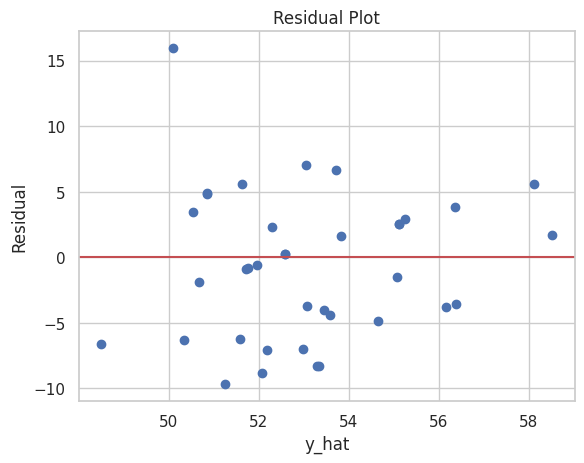

In [ ]:
res_plot(pred)

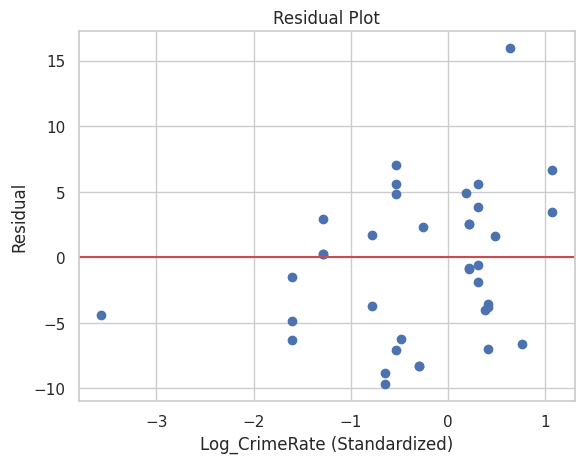

In [ ]:
plot_vs_CR((pred - np.ravel(Y_test)))

### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

param_dist = {"max_depth": sp_randint(2,20),
              "max_features": ["sqrt", "log2", None],
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "criterion": ["squared_error", "absolute_error"]}

samples = 10  # number of random samples
randomCV_dt = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=samples,cv=5, random_state = 0)

randomCV_dt.fit(X_final, np.ravel(Y_train))
print(randomCV_dt.best_params_)

{'criterion': 'squared_error', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 9}


In [ ]:
dt = DecisionTreeRegressor(**randomCV_dt.best_params_)

selector4 = RFECV(dt, step=1, cv=5)
selector4 = selector4.fit(X_final, np.ravel(Y_train))
print(selector4.support_)
print(selector4.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False]
[38 37  2 16 15 14 13 12 11 10 18 20 22 24 26 28 30 32 34 36 35 33 31 29
 27 25 23 21 19 17  9  8  7  6  3  1  5  4]


In [ ]:
X_final.columns[selector4.support_]

Index(['Log_CrimeRate'], dtype='object')

In [ ]:
print_metrics(dt, "Decision Tree*", X_train=X_final.loc[:, selector4.support_])

Decision Tree* R-squared: 0.32495414742362494
Decision Tree* RMSE: 5.306112812237127
Decision Tree* MAPE: 7.314988820971808


In [ ]:
dt.fit(X_final.loc[:, selector4.support_], np.ravel(Y_train))
pred = dt.predict(X_test_final.loc[:, selector4.support_])
print_test_metrics('Decision Tree', Y_test, pred)

Decision Tree R-squared: 0.42860057085956815
Decision Tree RMSE: 4.36941846108728
Decision Tree MAPE: 6.950427284489661


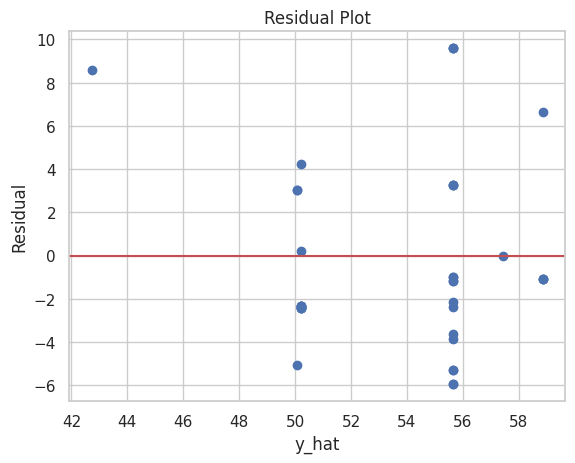

In [ ]:
res_plot(pred)

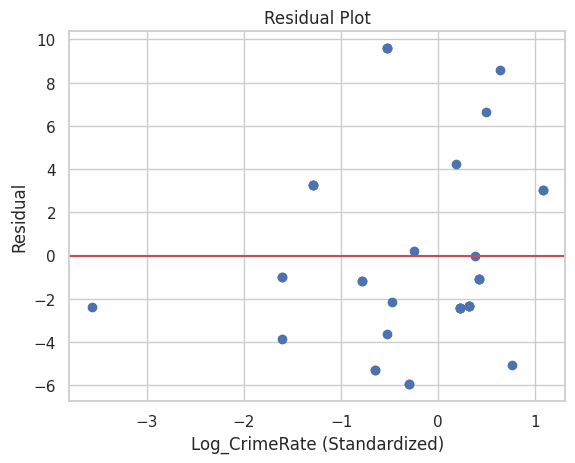

In [ ]:
plot_vs_CR((pred - np.ravel(Y_test)))

### Support Vector Machine

In [ ]:
svr_cols = ['Log_CrimeRate'] #Once again, no way to use RFE here so we'll just use this it looks good enough

In [ ]:
from sklearn.svm import SVR

svr = SVR()

param_dist = {
              'epsilon': sp.stats.uniform(0,10),
              'C': sp.stats.uniform(0,50),
               'gamma': ['scale', 'auto']}


samples = 10
randomCV_svr = RandomizedSearchCV(svr, param_distributions=param_dist, n_iter=samples,cv=5, random_state = 0)

randomCV_svr.fit(X_final, np.ravel(Y_train))
print(randomCV_svr.best_params_)

{'C': 4.356464985077036, 'epsilon': 0.2021839744032572, 'gamma': 'auto'}


In [ ]:
svr = SVR(**randomCV_svr.best_params_)
print_metrics(svr, "SVR*", X_train=X_final.loc[:,svr_cols])

SVR* R-squared: 0.06367666491331267
SVR* RMSE: 6.291511530115074
SVR* MAPE: 9.554098629067754


In [ ]:
svr.fit(X_final.loc[:, svr_cols], np.ravel(Y_train))
pred = svr.predict(X_test_final.loc[:,svr_cols])
print_test_metrics('SVR', Y_test, pred)

SVR R-squared: 0.006264403506497929
SVR RMSE: 5.762211059225709
SVR MAPE: 8.19946101967199


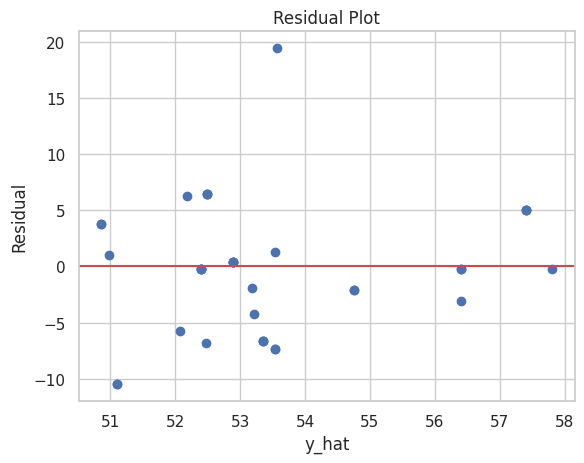

In [ ]:
res_plot(pred)

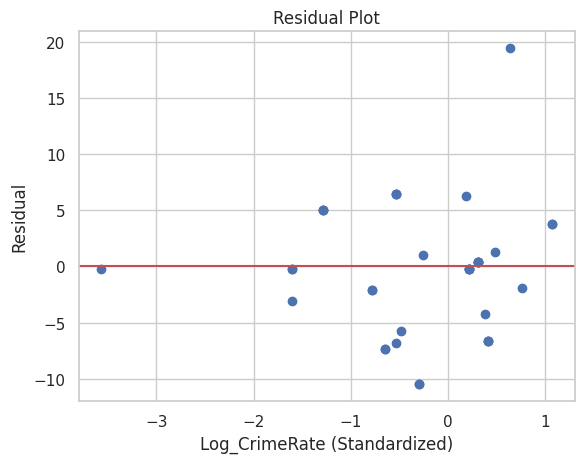

In [ ]:
plot_vs_CR((pred - np.ravel(Y_test)))

### Voting Scheme
Using the most successful models so far

In [ ]:
vr_cols = ['Log_CrimeRate'] #No using RFE here either

In [ ]:
from sklearn.ensemble import VotingRegressor

# No using CV for hyper-parameter tuning because these models have their parameters set already from above

voting_regressor = VotingRegressor(estimators=[('rf', rf4), ('gbr', gbr), ('knn', neigh)])
print_metrics(voting_regressor, "VR*", X_train = X_final.loc[:,vr_cols])

VR* R-squared: 0.5806638705235012
VR* RMSE: 4.169081385832069
VR* MAPE: 4.659158777922109


In [ ]:
voting_regressor.fit(X_final.loc[:,vr_cols], np.ravel(Y_train))
pred = voting_regressor.predict(X_test_final.loc[:,vr_cols])
print_test_metrics('VR', Y_test, pred)

VR R-squared: 0.8910351261116193
VR RMSE: 1.9080818411853784
VR MAPE: 2.684709195367395


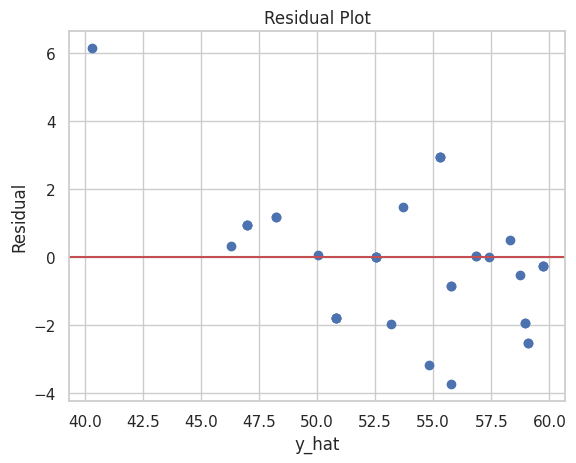

In [ ]:
res_plot(pred) #Downward sloping too

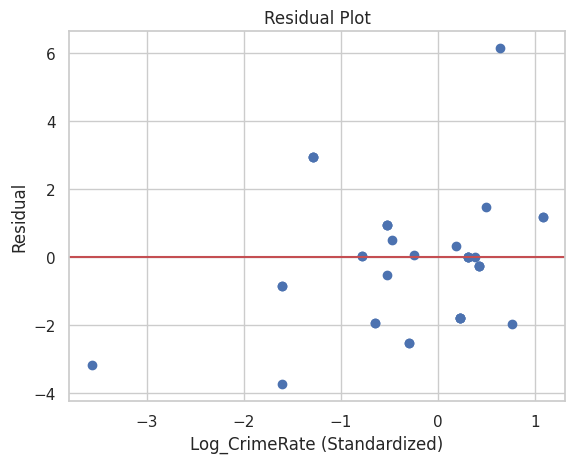

In [ ]:
plot_vs_CR((pred - np.ravel(Y_test))) #Funneling too here

## Final Model
Looks like there is a pretty predictable association between Crime Rate and Happy Score that kNN captures the best, so final changes will be made to prepare the model for final predictions

In [ ]:
# Retrain the model on all of the data for deployment

X_total = pd.concat([X_final, X_test_final], ignore_index=True)
Y_total = pd.concat([Y_train, Y_test], ignore_index=True)

In [ ]:
#Checking merging to see how it all went

print("X shape:", X_total.shape)
print("Y shape:", Y_total.shape)

X shape: (181, 38)
Y shape: (181, 1)


In [ ]:
#Double checking that the dataset isn't riddled with duplicate entries

prelim = pd.merge(X_total, Y_total, left_index=True, right_index=True)
print("Expected (181, 39); got", prelim.shape)

Expected (181, 39); got (181, 39)


In [ ]:
X_total = X_total[['Log_CrimeRate']] #Going to extract only the useful info

In [ ]:
# Going to refit the model from above using all of this data

final_model = KNeighborsRegressor(**randomCV_knn.best_params_)
final_model = final_model.fit(X_total, Y_total)

In [ ]:
print_metrics(final_model, "KNN!", X_train=X_total, Y_train=Y_total) # Not much different from before so good

KNN! R-squared: 0.7165776061038978
KNN! RMSE: 2.7597646458369964
KNN! MAPE: 1.5788215618900765


In [ ]:
X_feed = clean_up_fully(x_test)
X_feed = X_feed[['Log_CrimeRate']]

[(0, 'FBI.TotalCrime'), (20, 'Enrollment'), (36, 'FBI.TotalCrime'), (51, 'FBI.TotalCrime'), (53, 'FBI.TotalCrime'), (59, 'Earn'), (63, 'Enrollment'), (79, 'Enrollment'), (89, 'FBI.TotalCrime')]


In [ ]:
X_feed.info() # Looks good to go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Log_CrimeRate  90 non-null     float64
dtypes: float64(1)
memory usage: 848.0 bytes


In [ ]:
x_test_orig.head()[['CrimeRate']]

,CrimeRate
0,381.8
1,229.1
2,514.7
3,196.2
4,405.9


In [ ]:
X_feed.head() # Comparing relative order of the two columns to double check no row shuffling ocurred; looks good so proceed

,Log_CrimeRate
0,0.312247
1,-1.159304
2,1.172831
3,-1.605963
4,0.488606


In [ ]:
final_predictions = final_model.predict(X_feed)

In [ ]:
final_predictions = pd.DataFrame(final_predictions, index=x_test_orig['Unnamed: 0'], columns = ['HappyScore'])
final_predictions.index.name = None

In [ ]:
final_predictions

,HappyScore
14,52.540000
109,69.090000
159,47.138464
162,56.610000
253,52.230000
...,...
98,47.060000
142,52.540000
62,55.140000
203,59.960000
